---
# 1. Giới thiệu bài toán và bộ dữ liệu


## 1.1 Giới thiệu bộ dữ liệu

Bộ dữ liệu Heart Failure Prediction Dataset được thu thập từ Kaggle/UCI,
bao gồm các thông số lâm sàng của bệnh nhân nhằm dự đoán nguy cơ mắc bệnh tim.

Dataset gồm 918 quan sát và 12 biến đầu vào, bao gồm:
- Các biến số: Age, RestingBP, Cholesterol, MaxHR, Oldpeak, …
- Các biến phân loại: Sex, ChestPainType, RestingECG, ExerciseAngina, ST_Slope

Biến mục tiêu HeartDisease:
- 0: Không mắc bệnh tim
- 1: Mắc bệnh tim


## 1.2 Mô tả các biến trong bộ dữ liệu


| Tên biến | Loại biến | Mô tả ý nghĩa | Giá trị / Đơn vị |
|---------|----------|--------------|------------------|
| Age | Định lượng | Tuổi của bệnh nhân | Năm |
| Sex | Định tính | Giới tính của bệnh nhân | M: Nam, F: Nữ |
| ChestPainType | Định tính | Loại đau ngực | TA: Đau thắt ngực điển hình<br>ATA: Đau thắt ngực không điển hình<br>NAP: Đau ngực không do tim<br>ASY: Không triệu chứng *(nguy hiểm nhất)* |
| RestingBP | Định lượng | Huyết áp khi nghỉ | mmHg |
| Cholesterol | Định lượng | Nồng độ cholesterol trong huyết thanh | mg/dl |
| FastingBS | Định tính | Đường huyết khi đói | 1: > 120 mg/dl *(nguy cơ tiểu đường)*<br>0: ≤ 120 mg/dl |
| RestingECG | Định tính | Kết quả điện tâm đồ khi nghỉ | Normal: Bình thường<br>ST: Bất thường sóng ST-T<br>LVH: Phì đại thất trái |
| MaxHR | Định lượng | Nhịp tim tối đa đạt được | Nhịp/phút (60–202) |
| ExerciseAngina | Định tính | Đau thắt ngực khi vận động | Y: Có<br>N: Không |
| Oldpeak | Định lượng | Độ chênh xuống của đoạn ST khi gắng sức | Oldpeak – Độ chênh xuống của đoạn ST khi gắng sức (chỉ số gián tiếp phản ánh thiếu máu cơ tim) |
| ST_Slope | Định tính | Độ dốc đoạn ST khi gắng sức | Up: Dốc lên *(bình thường)*<br>Flat: Bằng phẳng *(bất thường)*<br>Down: Dốc xuống *(nguy hiểm)* |
| HeartDisease | Mục tiêu | Kết quả chẩn đoán bệnh tim | 0: Không mắc bệnh<br>1: Mắc bệnh tim |


**Nhận xét:**

- Bộ dữ liệu bao gồm cả biến số (numerical) và biến phân loại (categorical), phản ánh đầy đủ các yếu tố lâm sàng liên quan đến bệnh tim mạch.
- Các biến như *Age, RestingBP, Cholesterol, MaxHR, Oldpeak* là các chỉ số sinh lý quan trọng, có khả năng ảnh hưởng trực tiếp đến nguy cơ mắc bệnh tim.
- Các biến định tính như *ChestPainType, ST_Slope, ExerciseAngina* mang tính chẩn đoán cao và sẽ được xử lý mã hóa trước khi huấn luyện mô hình học máy.
- Biến mục tiêu *HeartDisease* là biến nhị phân, phù hợp cho bài toán phân loại nhị phân trong học máy.


---
# 2. Tải dữ liệu và xem tổng quan


## 2.1 Tải dữ liệu


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

df = pd.read_csv("heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


 5 dòng đầu tiên cho thấy mỗi quan sát tương ứng với một bệnh nhân, các cột thể hiện các thông số lâm sàng và biến mục tiêu HeartDisease.

## 2.2 Thông tin tổng quát về dataset


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


- Dataset gồm 918 dòng dữ liệu và 12 cột.
- Dữ liệu bao gồm cả biến số (int, float) và biến phân loại (object). Không có cột nào bị thiếu dữ liệu theo kết quả ban đầu.

---
# 3. Kiểm tra chất lượng dữ liệu


## 3.1 Kiểm tra dữ liệu thiếu và trùng lặp

In [3]:
#Kiểm tra giá trị thiếu (NaN) và trùng lặp
print(f"- Tổng số dòng trùng lặp: {df.duplicated().sum()}")
print("\n- Giá trị thiếu (NaN) từng cột:")
print(df.isnull().sum())

- Tổng số dòng trùng lặp: 0

- Giá trị thiếu (NaN) từng cột:
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


Kết quả cho thấy dataset không có giá trị bị trùng lặp và giá trị thiếu

## 3.2 Kiểm tra mất cân bằng dữ liệu (Imbalanced Data)

Trong bài toán phân loại, việc kiểm tra tỷ lệ giữa các lớp là rất quan trọng. Nếu dữ liệu mất cân bằng nghiêm trọng, mô hình có thể thiên lệch về lớp chiếm đa số.

Phân phối biến mục tiêu HeartDisease:
HeartDisease
1    508
0    410
Name: count, dtype: int64

Tỷ lệ phần trăm:
HeartDisease
1    55.34
0    44.66
Name: proportion, dtype: float64


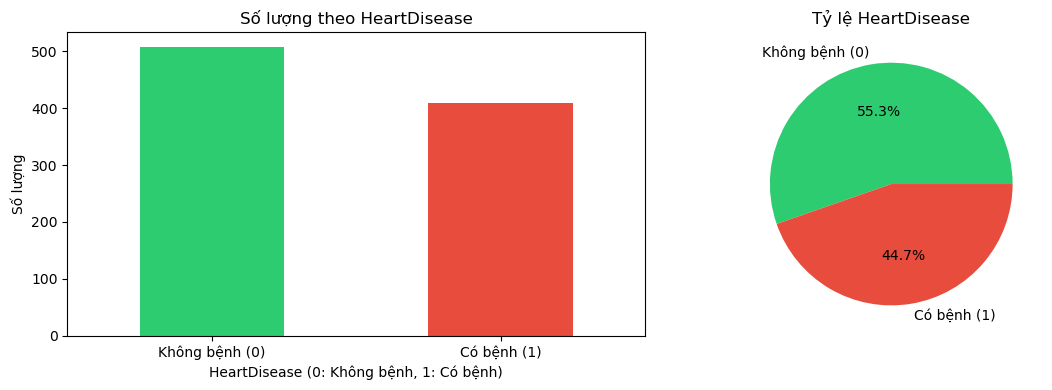

In [4]:
# Kiểm tra phân phối biến mục tiêu
print("Phân phối biến mục tiêu HeartDisease:")
print(df['HeartDisease'].value_counts())
print("\nTỷ lệ phần trăm:")
print(df['HeartDisease'].value_counts(normalize=True).mul(100).round(2))

# Trực quan hóa
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Biểu đồ cột
df['HeartDisease'].value_counts().plot(kind='bar', ax=axes[0], color=['#2ecc71', '#e74c3c'])
axes[0].set_title('Số lượng theo HeartDisease')
axes[0].set_xlabel('HeartDisease (0: Không bệnh, 1: Có bệnh)')
axes[0].set_ylabel('Số lượng')
axes[0].set_xticklabels(['Không bệnh (0)', 'Có bệnh (1)'], rotation=0)

# Biểu đồ tròn
df['HeartDisease'].value_counts().plot(kind='pie', ax=axes[1], autopct='%1.1f%%', 
                                        colors=['#2ecc71', '#e74c3c'],
                                        labels=['Không bệnh (0)', 'Có bệnh (1)'])
axes[1].set_title('Tỷ lệ HeartDisease')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

Nhận xét về mất cân bằng dữ liệu:

- Lớp HeartDisease = 1 (mắc bệnh) chiếm khoảng 55% (508 mẫu)
- Lớp HeartDisease = 0 (không mắc bệnh) chiếm khoảng 45% (410 mẫu)

Kết luận: Dữ liệu có sự mất cân bằng nhẹ nhưng không nghiêm trọng (tỷ lệ 55:45)

## 3.3 Thống kê mô tả các biến số

In [5]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Số lượng quan sát (COUNT)
- Tất cả các biến đều có 918 quan sát, cho thấy dataset đầy đủ và không tồn tại giá trị thiếu ở các cột số.

Giá trị trung bình (MEAN)
- Age có giá trị trung bình ≈ 53.5 tuổi, cho thấy phần lớn bệnh nhân thuộc nhóm trung niên đến cao tuổi, nhóm có nguy cơ cao mắc bệnh tim mạch.
- RestingBP trung bình ≈ 132 mmHg, cao hơn mức lý tưởng, phản ánh xu hướng tăng huyết áp trong tập dữ liệu.
- Cholesterol trung bình ≈ 198 mg/dL, tiệm cận ngưỡng cao, cho thấy nguy cơ rối loạn lipid máu ở nhiều bệnh nhân.
- MaxHR trung bình ≈ 136 bpm, phù hợp với nhịp tim khi gắng sức của nhóm tuổi trung niên.
- Oldpeak trung bình ≈ 0.89, cho thấy nhiều bệnh nhân có dấu hiệu ST-depression, liên quan đến thiếu máu cơ tim.
- Biến mục tiêu HeartDisease có giá trị trung bình ≈ 0.55, tương ứng khoảng 55% bệnh nhân mắc bệnh tim trong dataset.

Độ phân tán dữ liệu (STD)
- Cholesterol (std ≈ 109) có độ biến động lớn, phản ánh sự khác biệt rõ rệt về nồng độ cholesterol giữa các bệnh nhân.
- MaxHR (std ≈ 25.5) cho thấy sự khác nhau đáng kể về khả năng gắng sức tim mạch giữa các cá nhân.
- Oldpeak (std ≈ 1.07) có mức độ phân tán tương đối cao, cho thấy khả năng phân biệt tốt giữa nhóm mắc bệnh và không mắc bệnh.
- HeartDisease (std ≈ 0.50) phù hợp với đặc điểm của biến nhị phân.

Giá trị nhỏ nhất (MIN)
- Age = 28: bệnh nhân trẻ nhất trong : các giá trị không hợp lý về mặt y khoa, nhiều khả năng là giá trị thiếu được mã hóa bằng 0 và cần xử lý trong bước tiền xử lý.
- MaxHR = 60: nhịp tim tối thiểu khi gắng sức, có thể gặp ở bệnh nhân lớn tuổi hoặc thể trạng yếu.
- Oldpeak = -2.6: giá trị âm của ST-depression, cần được kiểm tra và xử lý thêm.

Giá trị lớn nhất (MAX)
- Age = 77: bệnh nhân lớn tuổi nhất trong dataset.
- RestingBP = 200 mmHg: mức huyết áp rất cao, thuộc nhóm nguy cơ tim mạch nghiêm trọng.
- Cholesterol = 603 mg/dL: giá trị rất cao, có khả năng là outlier và cần được xem xét khi huấn luyện mô hình.
- MaxHR = 202 bpm: thường gặp ở bệnh nhân trẻ tuổi hoặc có khả năng gắng sức tốt.
- Oldpeak = 6.2: mức ST-depression rất cao, cho thấy nguy cơ thiếu máu cơ tim nghiêm trọng.


## 3.4 Thống kê các biến phân loại

In [6]:
df.describe(include='object')

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


Số lượng quan sát (COUNT)
- Tất cả các biến định tính gồm Sex, ChestPainType, RestingECG, ExerciseAngina, ST_Slope đều có 918 quan sát.
- Điều này cho thấy không tồn tại giá trị thiếu ở các biến định tính trong dataset.

Số lượng giá trị khác nhau (UNIQUE)
- Sex có 2 giá trị (M, F).
- ChestPainType có 4 nhóm, phản ánh đầy đủ các loại đau ngực lâm sàng.
- RestingECG có 3 giá trị, đại diện cho các trạng thái điện tâm đồ khi nghỉ.
- ExerciseAngina có 2 giá trị (Y, N), cho biết sự xuất hiện của đau thắt ngực khi gắng sức.
- ST_Slope có 3 nhóm, thể hiện mức độ bất thường của đoạn ST khi gắng sức.

Giá trị xuất hiện nhiều nhất (TOP)
- Sex: giá trị phổ biến nhất là M, cho thấy nam giới chiếm tỷ lệ cao hơn trong dataset.
- ChestPainType: ASY (không triệu chứng) là nhóm chiếm ưu thế, đây là loại đau ngực nguy hiểm nhất do dễ bị bỏ sót trong chẩn đoán.
- RestingECG: giá trị Normal xuất hiện nhiều nhất, cho thấy phần lớn bệnh nhân có điện tâm đồ khi nghỉ bình thường.
- ExerciseAngina: giá trị N chiếm đa số, tức phần lớn bệnh nhân không có đau thắt ngực khi vận động.
- ST_Slope: giá trị Flat xuất hiện nhiều nhất, đây là dấu hiệu bất thường, có liên quan đến nguy cơ thiếu máu cơ tim.

Tần suất của giá trị phổ biến nhất (FREQ)
- Sex (M) xuất hiện 725 lần, chiếm tỷ lệ lớn trong tập dữ liệu.
- ChestPainType (ASY) xuất hiện 496 lần, cho thấy nhiều bệnh nhân mắc bệnh tim nhưng không biểu hiện triệu chứng đau ngực rõ ràng.
- RestingECG (Normal) xuất hiện 552 lần, tuy nhiên điều này không loại trừ khả năng mắc bệnh tim, do nhiều trường hợp bệnh vẫn có ECG nghỉ bình thường.
- ExerciseAngina (N) xuất hiện 547 lần, cho thấy đau thắt ngực khi gắng sức không phải lúc nào cũng xuất hiện.
- ST_Slope (Flat) xuất hiện 460 lần, phản ánh tỷ lệ đáng kể bệnh nhân có dấu hiệu bất thường đoạn ST.

Nhận xét tổng quan
- Các biến định tính trong dataset có phân bố không đồng đều, với một số giá trị chiếm ưu thế rõ rệt.
- Những biến như ChestPainType và ST_Slope mang tính chẩn đoán cao và có khả năng đóng vai trò quan trọng trong việc dự đoán bệnh tim.
- Do các biến đều là dạng phân loại, chúng cần được mã hóa (encoding) trước khi đưa vào huấn luyện mô hình học máy.

## 3.5 Đánh giá mức độ đa dạng của từng biến

In [7]:
summary_count = pd.DataFrame({
    "Cột": df.columns,
    # "Kiểu dữ liệu": df.dtypes.values,
    "Số lượng": df.count().values,
    "Số lượng giá trị khác nhau": [df[col].nunique() for col in df.columns],
    "Tỷ lệ khác nhau (%)": [df[col].nunique() / df[col].count() * 100 for col in df.columns]
})
summary_count.style \
    .format({"Tỷ lệ khác nhau (%)": "{:.2f}"}) 


,Cột,Số lượng,Số lượng giá trị khác nhau,Tỷ lệ khác nhau (%)
0,Age,918,50,5.45
1,Sex,918,2,0.22
2,ChestPainType,918,4,0.44
3,RestingBP,918,67,7.30
4,Cholesterol,918,222,24.18
5,FastingBS,918,2,0.22
6,RestingECG,918,3,0.33
7,MaxHR,918,119,12.96
8,ExerciseAngina,918,2,0.22
9,Oldpeak,918,53,5.77


Bảng thống kê dưới đây thể hiện số lượng quan sát, số lượng giá trị khác nhau và tỷ lệ giá trị khác nhau của từng biến trong dataset.
- Tất cả các biến đều có 918 quan sát, cho thấy dataset đầy đủ và không tồn tại giá trị thiếu.
- Các biến định tính như Sex, FastingBS, ExerciseAngina, HeartDisease chỉ có 2 giá trị khác nhau với tỷ lệ khác nhau rất thấp (≈ 0.22%), phù hợp với các biến nhị phân và dễ dàng mã hóa.
- Các biến phân loại đa nhóm như ChestPainType, RestingECG, ST_Slope có số lượng giá trị khác nhau nhỏ (từ 3–4 giá trị) và tỷ lệ khác nhau thấp (< 1%), cho thấy các biến này có cấu trúc rõ ràng và phù hợp cho One-Hot Encoding.
- Các biến định lượng như Cholesterol (222 giá trị, ≈ 24.18%), MaxHR (119 giá trị, ≈ 12.96%), RestingBP (67 giá trị, ≈ 7.30%) có tỷ lệ giá trị khác nhau cao, phản ánh mức độ biến thiên lớn trong dữ liệu và mang nhiều thông tin cho mô hình học máy.
- Biến Age và Oldpeak có mức độ đa dạng trung bình, cho thấy sự phân bố hợp lý theo nhóm tuổi và mức độ ST-depression.

Kết luận:
- Dataset bao gồm cả biến định tính và định lượng với mức độ đa dạng phù hợp cho bài toán dự đoán bệnh tim.
- Các biến có tỷ lệ giá trị khác nhau cao nhiều khả năng sẽ đóng vai trò quan trọng trong việc phân biệt giữa nhóm mắc bệnh và không mắc bệnh.
- Kết quả thống kê này là cơ sở để lựa chọn phương pháp mã hóa, chuẩn hóa và xây dựng mô hình học máy ở các bước tiếp theo.

---
# 4. Khám phá và làm sạch dữ liệu

## 4.1 Phát hiện outlier bằng phương pháp IQR

In [8]:
iqr_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

Q1 = df[iqr_cols].quantile(0.25)
Q3 = df[iqr_cols].quantile(0.75)
IQR = Q3 - Q1

outliers = ((df[iqr_cols] < (Q1 - 1.5 * IQR)) | 
            (df[iqr_cols] > (Q3 + 1.5 * IQR))).sum()

outliers


Age              0
RestingBP       28
Cholesterol    183
MaxHR            2
Oldpeak         16
dtype: int64

**Phát hiện giá trị ngoại lai (Outlier Detection)**

**Nhận xét:**
- Biến **Age** không xuất hiện outlier, cho thấy phân bố tuổi hợp lý.
- Các biến **RestingBP** và **Cholesterol** có số lượng outlier đáng kể, phản ánh sự biến động lớn của các chỉ số sinh lý trong dataset.
- Biến **MaxHR** chỉ có rất ít outlier, cho thấy dữ liệu tương đối ổn định.
- Biến **Oldpeak** xuất hiện một số giá trị ngoại lai, tuy nhiên đây là biến mang ý nghĩa lâm sàng quan trọng và không nên loại bỏ vội vàng.
**Kết luận:**
- Việc phát hiện outlier giúp hiểu rõ hơn đặc điểm phân bố dữ liệu và hỗ trợ lựa chọn chiến lược xử lý phù hợp trước khi huấn luyện mô hình.

## 4.2 Kiểm tra giá trị bất thường (0 và giá trị âm)

In [9]:
print("Kiểm tra số giá trị = 0 và giá trị âm trong các cột số:\n")

for col in df.select_dtypes(include='number').columns:
    print(col)
    print(f"\t Số giá trị = 0: {(df[col] == 0).sum()}")
    print(f"\t Số giá trị âm: {(df[col] < 0).sum()}")


Kiểm tra số giá trị = 0 và giá trị âm trong các cột số:

Age
	 Số giá trị = 0: 0
	 Số giá trị âm: 0
RestingBP
	 Số giá trị = 0: 1
	 Số giá trị âm: 0
Cholesterol
	 Số giá trị = 0: 172
	 Số giá trị âm: 0
FastingBS
	 Số giá trị = 0: 704
	 Số giá trị âm: 0
MaxHR
	 Số giá trị = 0: 0
	 Số giá trị âm: 0
Oldpeak
	 Số giá trị = 0: 368
	 Số giá trị âm: 13
HeartDisease
	 Số giá trị = 0: 410
	 Số giá trị âm: 0


## 4.3 Kiểm tra phân phối dữ liệu

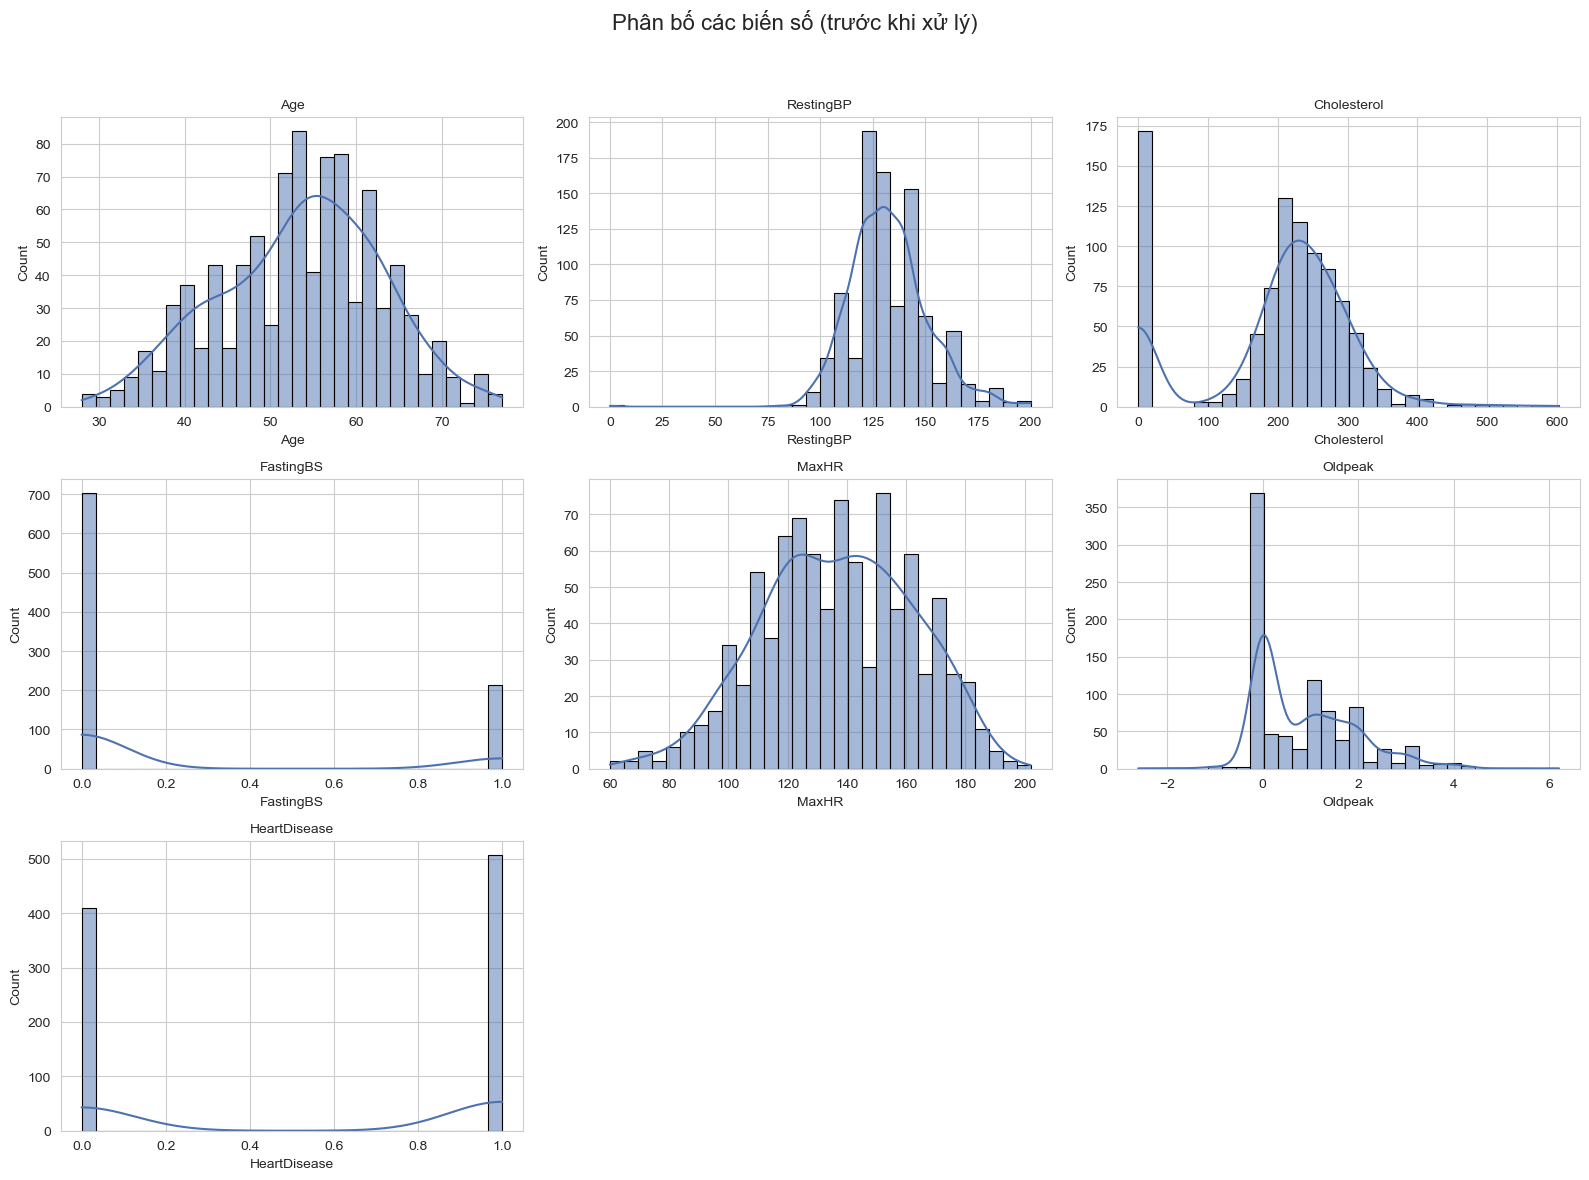

In [10]:
num_cols = df.select_dtypes(include='number').columns

plt.figure(figsize=(16, 12))
cols = 3
rows = math.ceil(len(num_cols) / cols)

sns.set_style("whitegrid")

for i, col in enumerate(num_cols, 1):
    plt.subplot(rows, cols, i)
    
    sns.histplot(
        df[col],
        bins=30,
        kde=True,
        stat='count',
        color='#4C72B0',
        edgecolor='black'
    )
    
    plt.title(col, fontsize=10)
    plt.xlabel(col)
    plt.ylabel("Count")

plt.suptitle("Phân bố các biến số (trước khi xử lý)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


**Nhận xét:**
- Các biến **Age** và **MaxHR** không xuất hiện giá trị bằng 0 hoặc âm, cho thấy dữ liệu hợp lý về mặt sinh lý.
- Biến **RestingBP** xuất hiện một số giá trị bằng 0, đây là giá trị không hợp lý về mặt y khoa và có khả năng đại diện cho dữ liệu thiếu.
- Biến **Cholesterol** có số lượng lớn giá trị bằng 0, cần được xử lý trước khi huấn luyện mô hình vì cholesterol bằng 0 là không thực tế.
- Biến **Oldpeak** xuất hiện một số giá trị âm và bằng 0. Trong đó, giá trị âm cần được xem xét và xử lý cẩn thận, trong khi giá trị 0 có thể chấp nhận trong một số trường hợp lâm sàng.
- Các biến nhị phân như **FastingBS** và **HeartDisease** có giá trị bằng 0 là hoàn toàn bình thường.
**Kết luận:**
- Việc kiểm tra giá trị bằng 0 và giá trị âm giúp đảm bảo chất lượng dữ liệu và nâng cao độ tin cậy của mô hình học máy.

## 4.4 Làm sạch dữ liệu

In [11]:
df_clean = df.copy()

# 1. RestingBP: giá trị = 0 là không hợp lý → thay bằng median (loại 0)
rbp_median = df_clean.loc[df_clean['RestingBP'] > 0, 'RestingBP'].median()
df_clean.loc[df_clean['RestingBP'] == 0, 'RestingBP'] = rbp_median

# 2. Cholesterol: giá trị = 0 là không hợp lý → thay bằng median (loại 0)
chol_median = df_clean.loc[df_clean['Cholesterol'] > 0, 'Cholesterol'].median()
df_clean.loc[df_clean['Cholesterol'] == 0, 'Cholesterol'] = chol_median

# 3. Oldpeak: GIỮ NGUYÊN (kể cả giá trị âm)

# Kiểm tra nhanh sau xử lý
print("Kiểm tra sau xử lý:\n")
for col in ['RestingBP', 'Cholesterol', 'Oldpeak']:
    print(col)
    print(f"  Số giá trị = 0: {(df_clean[col] == 0).sum()}")
    print(f"  Số giá trị âm: {(df_clean[col] < 0).sum()}")


Kiểm tra sau xử lý:

RestingBP
  Số giá trị = 0: 0
  Số giá trị âm: 0
Cholesterol
  Số giá trị = 0: 0
  Số giá trị âm: 0
Oldpeak
  Số giá trị = 0: 368
  Số giá trị âm: 13


## 4.5 Kiểm tra dữ liệu sau khi xử lý

Sau khi hoàn tất quá trình kiểm tra và làm sạch dữ liệu (Data Cleaning), nhóm em xin báo cáo các quyết định xử lý đối với các biến số quan trọng trong bộ dữ liệu dự đoán bệnh tim như sau:


### 4.5.1 Xử lý giá trị bằng 0 ở RestingBP và Cholesterol

Về mặt sinh lý, huyết áp và cholesterol của người đang sống không thể bằng 0.
Do đó, các giá trị này được xem là dữ liệu thiếu và được thay thế bằng giá trị trung vị (Median).


### 4.5.2 Giữ nguyên giá trị âm của Oldpeak

Oldpeak biểu diễn mức độ chênh ST trên điện tâm đồ.
Giá trị âm mang ý nghĩa lâm sàng (ST depression), do đó không được xem là lỗi và được giữ nguyên.




### 4.5.3 Kiểm tra dữ liệu sau xử lý

Sau khi làm sạch, tiến hành kiểm tra lại để đảm bảo các giá trị bất thường đã được xử lý đúng cách.



---
# 5. Phân tích phân phối dữ liệu (EDA)


## 5.1 Phân phối các biến số

In [12]:
numeric_cols = df_clean.select_dtypes(include='number').columns.drop('HeartDisease')
print("So sánh đặc điểm trung bình của người mắc bệnh tim và không mắc bệnh tim")
summary_target_clean = (
    df_clean
    .groupby('HeartDisease')[numeric_cols]
    .agg(['mean', 'median'])
    .round(2)
)

summary_target_clean


So sánh đặc điểm trung bình của người mắc bệnh tim và không mắc bệnh tim


Age        RestingBP        Cholesterol        FastingBS  \
               mean median      mean median        mean median      mean   
HeartDisease                                                               
0             50.55   51.0    130.18  130.0      238.68  235.0      0.11   
1             55.90   57.0    134.44  132.0      246.85  237.0      0.33   

                      MaxHR        Oldpeak         
             median    mean median    mean median  
HeartDisease                                       
0               0.0  148.15  150.0    0.41    0.0  
1               0.0  127.66  126.0    1.27    1.2

Kết quả thống kê và phân tích đặc điểm theo nhóm

Dựa trên tập dữ liệu đã được làm sạch, kết quả thống kê mô tả cho thấy sự khác biệt rõ rệt giữa nhóm mắc bệnh tim (HeartDisease = 1) và nhóm không mắc bệnh (HeartDisease = 0). Những khác biệt này phản ánh các yếu tố nguy cơ tim mạch điển hình và phù hợp với kiến thức y khoa.



Các chỉ số sinh tồn và nhân khẩu học

- Age (tuổi) của nhóm mắc bệnh tim có giá trị trung bình cao hơn, khoảng 55.9 tuổi, trong khi nhóm không mắc bệnh có độ tuổi trung bình khoảng 50.6 tuổi. Điều này cho thấy nguy cơ mắc bệnh tim có xu hướng gia tăng theo tuổi tác.

- RestingBP (huyết áp nghỉ) ở nhóm mắc bệnh cao hơn so với nhóm không mắc bệnh, với giá trị trung bình lần lượt là 134.4 mmHg và 130.2 mmHg. Sự khác biệt này phản ánh vai trò của tăng huyết áp trong việc làm gia tăng gánh nặng cho hệ tim mạch.

- MaxHR (nhịp tim tối đa) ở nhóm mắc bệnh thấp hơn rõ rệt, trung bình khoảng 127.7 nhịp mỗi phút, trong khi nhóm không mắc bệnh đạt khoảng 148.2 nhịp mỗi phút. Điều này cho thấy khả năng đáp ứng của tim khi gắng sức ở nhóm mắc bệnh bị suy giảm.



Oldpeak (độ chênh đoạn ST)

- Biến Oldpeak thể hiện sự khác biệt rõ ràng nhất giữa hai nhóm. Giá trị trung bình của Oldpeak ở nhóm mắc bệnh tim là khoảng 1.27, cao hơn đáng kể so với nhóm không mắc bệnh (0.41).

- Kết quả này cho thấy mức độ chênh đoạn ST, phản ánh tình trạng thiếu máu cơ tim cục bộ, là một dấu hiệu lâm sàng quan trọng giúp phân biệt giữa hai nhóm đối tượng.


Cholesterol

- Biến Cholesterol, dữ liệu cho thấy nhóm mắc bệnh tim có mức Cholesterol trung bình cao hơn (246.85) so với nhóm không mắc bệnh (238.68). Sự khác biệt này cho thấy nồng độ cholesterol cao là một yếu tố nguy cơ quan trọng của bệnh tim mạch.


**Kết luận:**

Nhìn chung, các kết quả thống kê sau khi làm sạch dữ liệu cho thấy những biến như tuổi, huyết áp nghỉ, nhịp tim tối đa và đặc biệt là Oldpeak có sự khác biệt rõ rệt giữa hai nhóm mắc bệnh và không mắc bệnh. Những biến này được kỳ vọng sẽ đóng vai trò quan trọng trong việc xây dựng các mô hình dự đoán nguy cơ mắc bệnh tim.


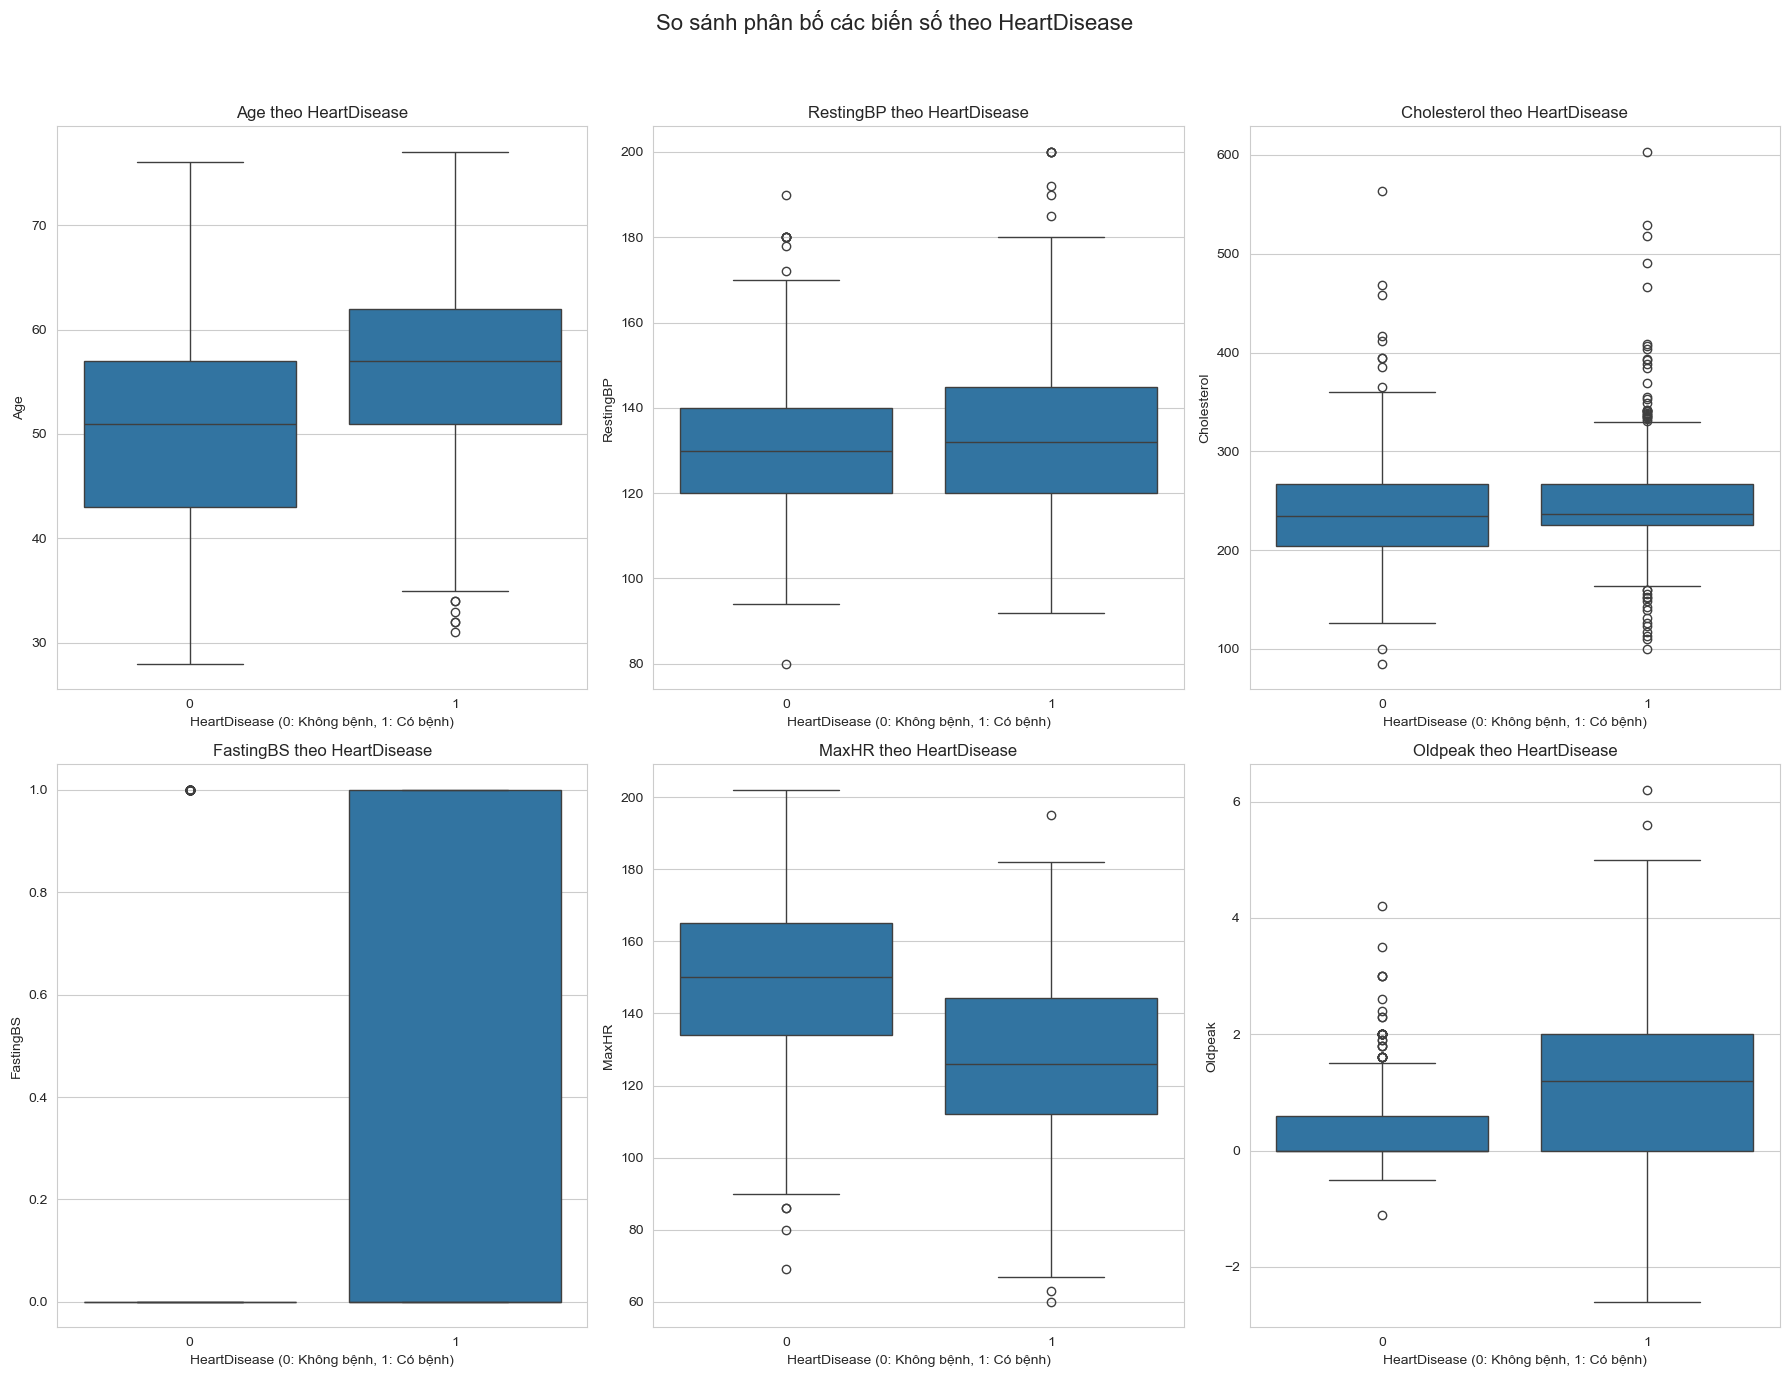

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

sns.set_style("whitegrid")

cols_per_row = 3
rows = math.ceil(len(numeric_cols) / cols_per_row)

fig, axes = plt.subplots(rows, cols_per_row, figsize=(18, 14))
axes = axes.flatten()

for ax, col in zip(axes, numeric_cols):
    sns.boxplot(
        x='HeartDisease',
        y=col,
        data=df_clean,
        ax=ax
    )
    ax.set_title(f'{col} theo HeartDisease')
    ax.set_xlabel('HeartDisease (0: Không bệnh, 1: Có bệnh)')
    ax.set_ylabel(col)

for ax in axes[len(numeric_cols):]:
    ax.axis('off')

plt.suptitle("So sánh phân bố các biến số theo HeartDisease", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


**Nhận xét phân bố các biến số theo biến mục tiêu HeartDisease**



Các biểu đồ boxplot cho thấy sự khác biệt rõ rệt về phân bố giữa nhóm mắc bệnh tim (HeartDisease = 1) và nhóm không mắc bệnh tim (HeartDisease = 0) đối với hầu hết các biến số.

- Đối với biến Age, phân bố của nhóm mắc bệnh tim dịch chuyển về phía các giá trị cao hơn so với nhóm không mắc bệnh. Trung vị tuổi của nhóm mắc bệnh cao hơn, cho thấy tuổi tác có mối liên hệ rõ ràng với nguy cơ mắc bệnh tim.

- Biến RestingBP cho thấy nhóm mắc bệnh tim có xu hướng huyết áp nghỉ cao hơn. Mặc dù hai nhóm vẫn có sự chồng lấn nhất định, trung vị và phần lớn phân bố của nhóm mắc bệnh nằm ở mức cao hơn, phản ánh vai trò của tăng huyết áp trong bệnh tim mạch.
 
- Đối với Cholesterol, hai nhóm có phân bố tương đối chồng lấn. Tuy nhiên, nhóm mắc bệnh tim xuất hiện nhiều giá trị cao hơn và có độ phân tán lớn hơn, cho thấy Cholesterol có thể đóng vai trò phân biệt ở mức độ nhất định nhưng không phải là biến mạnh nhất.

- Biến FastingBS thể hiện sự khác biệt rõ ràng giữa hai nhóm. Nhóm không mắc bệnh chủ yếu tập trung ở giá trị 0, trong khi nhóm mắc bệnh có tỷ lệ xuất hiện giá trị 1 cao hơn, phản ánh mối liên hệ giữa rối loạn đường huyết và nguy cơ bệnh tim.

- Biến MaxHR cho thấy sự phân tách khá tốt giữa hai nhóm. Nhóm mắc bệnh tim có nhịp tim tối đa thấp hơn rõ rệt, với trung vị và phần lớn phân bố nằm ở mức thấp hơn so với nhóm không mắc bệnh.

- Biến Oldpeak thể hiện sự khác biệt rõ rệt nhất. Nhóm không mắc bệnh tập trung chủ yếu quanh các giá trị thấp, trong khi nhóm mắc bệnh có phân bố rộng hơn và trung vị cao hơn đáng kể. Điều này cho thấy Oldpeak là biến có khả năng phân biệt rất mạnh giữa hai nhóm đối tượng.

- Nhìn chung, các biểu đồ boxplot cho thấy Age, MaxHR và đặc biệt là Oldpeak là những biến có khả năng phân biệt tốt giữa nhóm mắc bệnh tim và nhóm không mắc bệnh, và được kỳ vọng sẽ đóng vai trò quan trọng trong các mô hình dự đoán ở các bước tiếp theo.


## 5.2 Phân phối biến mục tiêu HeartDisease

In [14]:
from tabulate import tabulate

categorical_cols = df_clean.select_dtypes(include='object').columns

for col in categorical_cols:
    ct = (
        pd.crosstab(df_clean[col], df_clean['HeartDisease'], normalize='index')
        .mul(100)
        .round(2)
    )
    
    table = pd.DataFrame({
        'Giá trị': ct.index,
        'Tỉ lệ mắc bệnh (%)': ct[1].values,
        'Tỉ lệ không mắc (%)': ct[0].values
    })
    
    print(f"\nTỉ lệ HeartDisease theo {col}:")
    print(tabulate(table, headers='keys', tablefmt='fancy_grid', showindex=False))



Tỉ lệ HeartDisease theo Sex:
╒═══════════╤══════════════════════╤═══════════════════════╕
│ Giá trị   │   Tỉ lệ mắc bệnh (%) │   Tỉ lệ không mắc (%) │
╞═══════════╪══════════════════════╪═══════════════════════╡
│ F         │                25.91 │                 74.09 │
├───────────┼──────────────────────┼───────────────────────┤
│ M         │                63.17 │                 36.83 │
╘═══════════╧══════════════════════╧═══════════════════════╛

Tỉ lệ HeartDisease theo ChestPainType:
╒═══════════╤══════════════════════╤═══════════════════════╕
│ Giá trị   │   Tỉ lệ mắc bệnh (%) │   Tỉ lệ không mắc (%) │
╞═══════════╪══════════════════════╪═══════════════════════╡
│ ASY       │                79.03 │                 20.97 │
├───────────┼──────────────────────┼───────────────────────┤
│ ATA       │                13.87 │                 86.13 │
├───────────┼──────────────────────┼───────────────────────┤
│ NAP       │                35.47 │                 64.53 │
├───────────┼──

**Nhận xét tỷ lệ mắc bệnh tim theo các biến phân loại**

Bảng thống kê tỷ lệ cho thấy mối liên hệ rõ rệt giữa các biến phân loại và khả năng mắc bệnh tim (HeartDisease).

- Đối với biến Sex, tỷ lệ mắc bệnh tim ở nam giới cao hơn đáng kể so với nữ giới. Cụ thể, khoảng 63.17% nam giới mắc bệnh tim, trong khi tỷ lệ này ở nữ giới chỉ khoảng 25.91%. Điều này cho thấy giới tính nam là một yếu tố nguy cơ quan trọng đối với bệnh tim mạch.

- Xét theo ChestPainType, nhóm ASY (không triệu chứng) có tỷ lệ mắc bệnh tim cao nhất, lên tới 79.03%. Ngược lại, nhóm ATA có tỷ lệ mắc bệnh thấp nhất (13.87%). Các nhóm NAP và TA có tỷ lệ mắc bệnh ở mức trung bình. Kết quả này cho thấy loại đau ngực là một biến phân loại có khả năng phân biệt rất mạnh giữa các nhóm nguy cơ.

- Đối với RestingECG, nhóm có bất thường ST cho thấy tỷ lệ mắc bệnh tim cao nhất (65.73%), tiếp theo là nhóm LVH (56.38%). Nhóm có điện tâm đồ bình thường (Normal) có tỷ lệ mắc bệnh thấp hơn. Điều này phản ánh vai trò của các bất thường điện tâm đồ trong việc nhận diện nguy cơ bệnh tim.

- Biến ExerciseAngina thể hiện sự khác biệt rất rõ ràng. Nhóm có đau thắt ngực khi gắng sức (Y) có tỷ lệ mắc bệnh tim lên tới 85.18%, cao hơn nhiều so với nhóm không có triệu chứng này (35.10%). Đây là một trong những biến phân loại có sức phân biệt mạnh nhất.

- Đối với ST_Slope, nhóm Flat và Down có tỷ lệ mắc bệnh tim rất cao, lần lượt là 82.83% và 77.78%. Trong khi đó, nhóm Up có tỷ lệ mắc bệnh thấp hơn đáng kể (19.75%). Kết quả này cho thấy độ dốc đoạn ST khi gắng sức là yếu tố lâm sàng quan trọng trong phân loại nguy cơ bệnh tim.

Tổng hợp lại, các biến phân loại như Sex, ChestPainType, ExerciseAngina và ST_Slope cho thấy mối liên hệ rất mạnh với biến mục tiêu HeartDisease.

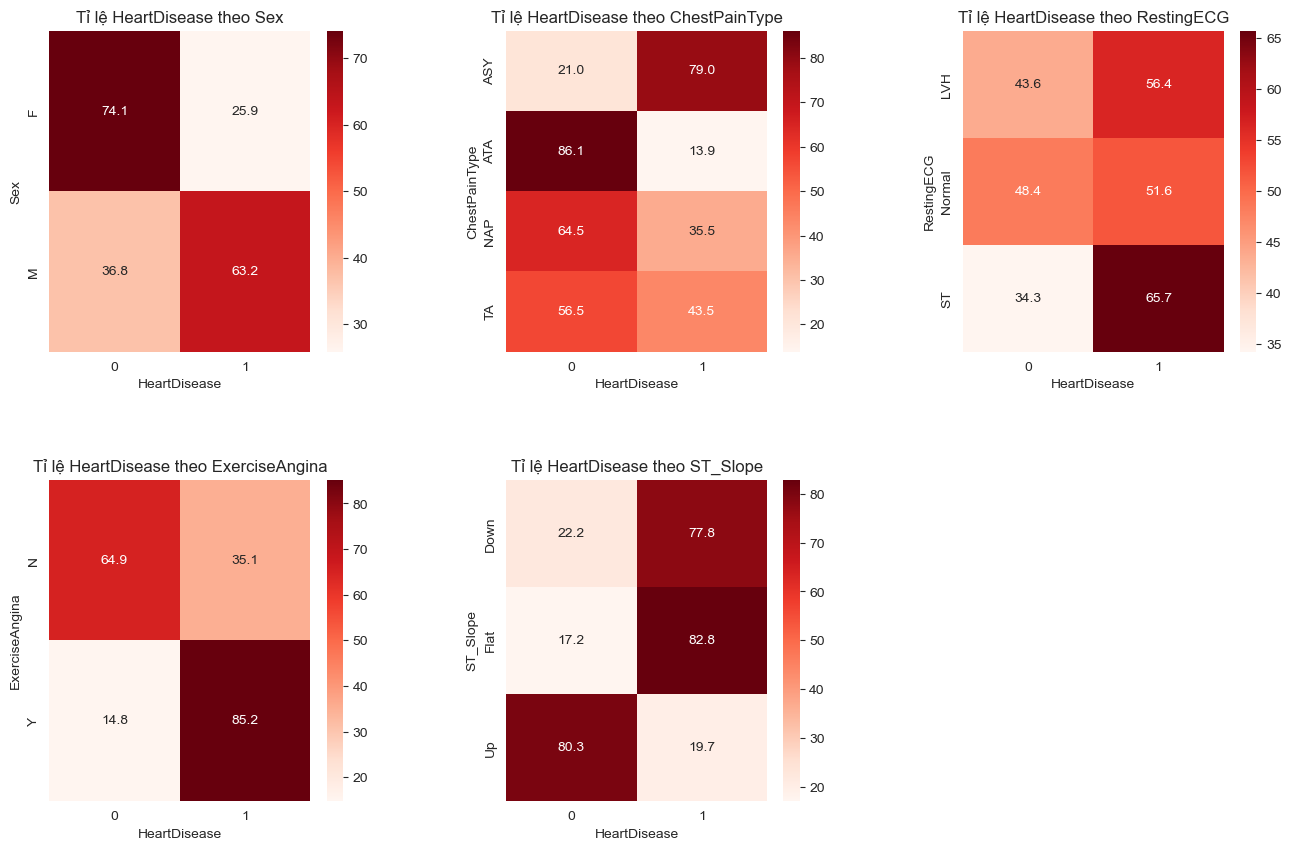

In [15]:
cols_per_row = 3
rows = math.ceil(len(categorical_cols) / cols_per_row)

plt.figure(figsize=(16, 10))

for i, col in enumerate(categorical_cols, 1):
    ct = (
        pd.crosstab(df_clean[col], df_clean['HeartDisease'], normalize='index')
        .mul(100)
    )
    
    ax = plt.subplot(rows, cols_per_row, i)
    sns.heatmap(
        ct,
        annot=True,
        fmt=".1f",
        cmap='Reds',
        cbar=True,
        ax=ax
    )
    
    ax.set_title(f'Tỉ lệ HeartDisease theo {col}')
    ax.set_xlabel('HeartDisease')
    ax.set_ylabel(col)

plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.show()


Nhận xét trực quan tỷ lệ mắc bệnh tim theo các biến phân loại

Các biểu đồ heatmap giúp thể hiện trực quan mức độ khác biệt về tỷ lệ mắc bệnh tim (HeartDisease) giữa các nhóm giá trị của từng biến phân loại. Màu sắc đậm thể hiện tỷ lệ mắc bệnh cao, trong khi màu nhạt biểu thị tỷ lệ thấp.

- Đối với biến Sex, heatmap cho thấy nam giới có tỷ lệ mắc bệnh tim cao hơn rõ rệt so với nữ giới. Ô tương ứng với nam giới và HeartDisease = 1 có màu đậm hơn, phản ánh nguy cơ mắc bệnh tim cao ở nhóm nam.

- Ở biến ChestPainType, nhóm ASY (không triệu chứng) nổi bật với tỷ lệ mắc bệnh tim rất cao, thể hiện qua màu sắc đậm nhất ở cột HeartDisease = 1. Ngược lại, nhóm ATA có màu nhạt hơn rõ rệt, cho thấy tỷ lệ mắc bệnh thấp. Điều này cho thấy loại đau ngực là yếu tố phân loại quan trọng trong nhận diện nguy cơ bệnh tim.

- Đối với RestingECG, nhóm có bất thường ST thể hiện tỷ lệ mắc bệnh tim cao hơn so với các nhóm còn lại. Nhóm Normal có màu sắc trung gian, trong khi nhóm LVH cũng cho thấy nguy cơ tương đối cao. Sự khác biệt màu sắc giữa các nhóm phản ánh vai trò của kết quả điện tâm đồ trong đánh giá bệnh tim.

- Biến ExerciseAngina cho thấy sự phân tách rất rõ ràng. Nhóm có đau thắt ngực khi gắng sức (Y) có màu sắc đậm nhất ở cột HeartDisease = 1, trong khi nhóm không có triệu chứng (N) có màu nhạt hơn. Điều này cho thấy ExerciseAngina là một trong những biến phân loại có khả năng phân biệt mạnh nhất.

- Đối với ST_Slope, hai nhóm Flat và Down có tỷ lệ mắc bệnh tim rất cao, thể hiện qua màu sắc đậm ở cột HeartDisease = 1. Ngược lại, nhóm Up có màu nhạt hơn đáng kể, cho thấy nguy cơ mắc bệnh tim thấp hơn. Kết quả này cho thấy độ dốc đoạn ST khi gắng sức là dấu hiệu lâm sàng quan trọng trong phân loại nguy cơ.

Nhìn chung, các heatmap cho thấy các biến phân loại như Sex, ChestPainType, ExerciseAngina và ST_Slope có mối liên hệ mạnh với biến mục tiêu HeartDisease. Những biến này thể hiện khả năng phân biệt rõ ràng giữa nhóm mắc bệnh và không mắc bệnh.

Nhận xét chung sau phân tích EDA theo biến mục tiêu

-> Dựa trên các phân tích thống kê và trực quan, một số biến cho thấy khả năng phân biệt rõ rệt giữa nhóm mắc bệnh và không mắc bệnh tim. Trong nhóm biến số, Oldpeak, MaxHR và Age thể hiện sự khác biệt rõ ràng giữa hai nhóm. Trong nhóm biến phân loại, ExerciseAngina, ST_Slope và ChestPainType cho thấy tỷ lệ mắc bệnh chênh lệch lớn giữa các nhóm giá trị.


## 5.3 Phân tích tương quan giữa các biến (Correlation Matrix)

Ma trận tương quan giúp xác định mối quan hệ tuyến tính giữa các biến số và với biến mục tiêu HeartDisease. Đồng thời, nó cũng giúp phát hiện hiện tượng đa cộng tuyến (multicollinearity) - khi các biến đầu vào có tương quan cao với nhau.

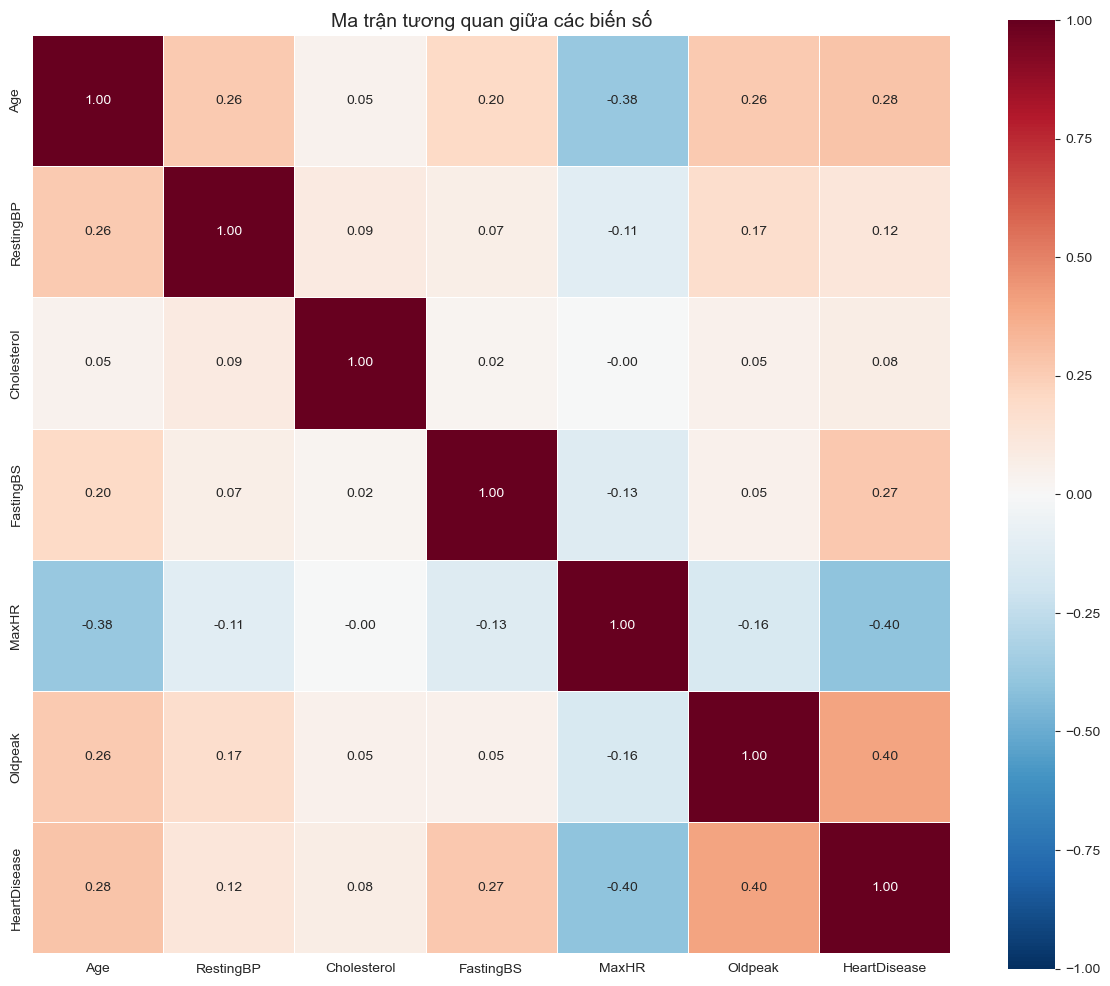


📊 Tương quan với HeartDisease (sắp xếp theo độ mạnh):
Oldpeak        0.403951
MaxHR         -0.400421
Age            0.282039
FastingBS      0.267291
RestingBP      0.117798
Cholesterol    0.076114


In [16]:
# Chọn các biến số để tính correlation
numeric_df = df_clean.select_dtypes(include=['int64', 'float64'])

# Tính ma trận tương quan
correlation_matrix = numeric_df.corr()

# Vẽ heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt='.2f',
    cmap='RdBu_r',
    center=0,
    square=True,
    linewidths=0.5,
    vmin=-1, vmax=1
)
plt.title('Ma trận tương quan giữa các biến số', fontsize=14)
plt.tight_layout()
plt.show()

# Hiển thị tương quan với biến mục tiêu
print("\n📊 Tương quan với HeartDisease (sắp xếp theo độ mạnh):")
target_corr = correlation_matrix['HeartDisease'].drop('HeartDisease').sort_values(key=abs, ascending=False)
print(target_corr.to_string())

**Nhận xét về ma trận tương quan:**

**1. Tương quan với biến mục tiêu HeartDisease:**
- **Oldpeak** có tương quan dương mạnh nhất (~0.40): Giá trị Oldpeak càng cao → nguy cơ mắc bệnh tim càng cao
- **MaxHR** có tương quan âm mạnh (~-0.40): Nhịp tim tối đa càng thấp → nguy cơ mắc bệnh tim càng cao
- **FastingBS** và **Age** có tương quan dương vừa phải với HeartDisease
- **Cholesterol** và **RestingBP** có tương quan yếu hơn

**2. Kiểm tra đa cộng tuyến (Multicollinearity):**
- Không có cặp biến đầu vào nào có tương quan > 0.8
- Các biến có mức độ độc lập tương đối → Không cần loại bỏ biến do đa cộng tuyến
- **Age** và **MaxHR** có tương quan âm (~-0.40): Tuổi càng cao thì nhịp tim tối đa càng thấp (phù hợp sinh lý)

**Kết luận:** Ma trận tương quan xác nhận các biến **Oldpeak**, **MaxHR**, **FastingBS**, và **Age** có mối liên hệ rõ ràng với bệnh tim và không tồn tại đa cộng tuyến nghiêm trọng giữa các biến đầu vào.

---
# 6. Tiền xử lý dữ liệu


Trong bài toán học máy, dữ liệu cần được chuyển về dạng số và có cùng thang đo trước khi đưa vào mô hình huấn luyện. Do đó, bước tiền xử lý dữ liệu được thực hiện nhằm đảm bảo mô hình học được đúng bản chất của dữ liệu và tránh các sai lệch không mong muốn.
Quy trình tiền xử lý trong bài gồm hai bước chính: mã hóa biến phân loại và chuẩn hóa các biến số.


## 6.1 Mã hóa các biến phân loại

Trong bài toán học máy, các thuật toán không thể làm việc trực tiếp với dữ liệu dạng chữ (categorical variables). Do đó, các biến phân loại cần được chuyển đổi sang dạng số trước khi đưa vào mô hình huấn luyện.

Dựa trên đặc điểm của bộ dữ liệu, các biến phân loại được chia thành hai nhóm và áp dụng các phương pháp mã hóa phù hợp như sau:

- Các biến phân loại không có thứ tự (nominal variables) sẽ được mã hóa bằng phương pháp One-Hot Encoding.
- Các biến phân loại nhị phân sẽ được mã hóa bằng phương pháp Label Encoding.

Cách tiếp cận này giúp giữ nguyên ý nghĩa của dữ liệu, tránh tạo ra mối quan hệ thứ tự giả giữa các giá trị phân loại.

### Chiến lược mã hóa
- Label Encoding được áp dụng cho các biến phân loại nhị phân:
  - Sex (F, M)
  - ExerciseAngina (N, Y)
  Việc sử dụng Label Encoding cho các biến này là phù hợp vì chúng chỉ có hai trạng thái và không gây ra hiểu nhầm về thứ tự.

- One-Hot Encoding được áp dụng cho các biến phân loại có nhiều hơn hai giá trị và không mang tính thứ tự:
  - ChestPainType
  - RestingECG
  - ST_Slope
  One-Hot Encoding giúp tránh việc mô hình hiểu sai mối quan hệ thứ tự giữa các nhóm giá trị.

-> Sau bước mã hóa, toàn bộ các biến phân loại đã được chuyển sang dạng số (0/1), và tập dữ liệu không còn cột nào có kiểu object. Các biến định lượng như Age, RestingBP, Cholesterol, MaxHR và Oldpeak được giữ nguyên để bảo toàn thông tin định lượng.

In [17]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df_clean.copy()

# 1. Label Encoding cho các biến nhị phân
label_cols = ['Sex', 'ExerciseAngina']

le = LabelEncoder()
for col in label_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# 2. One-Hot Encoding cho các biến còn lại
onehot_cols = ['ChestPainType', 'RestingECG', 'ST_Slope']
df_encoded = pd.get_dummies(df_encoded, columns=onehot_cols, drop_first=True)

df_encoded.head()


,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up
0,40,1,140,289,0,172,0,0.0,0,True,False,False,True,False,False,True
1,49,0,160,180,0,156,0,1.0,1,False,True,False,True,False,True,False
2,37,1,130,283,0,98,0,0.0,0,True,False,False,False,True,False,True
3,48,0,138,214,0,108,1,1.5,1,False,False,False,True,False,True,False
4,54,1,150,195,0,122,0,0.0,0,False,True,False,True,False,False,True


Sau bước mã hóa, toàn bộ các biến phân loại đã được chuyển sang dạng số và không còn cột dữ liệu dạng object. 
Các biến số liên tục như Age, Cholesterol và Oldpeak được giữ nguyên để bảo toàn thông tin định lượng.

## 6.2 Chia tập train / test



### Vì sao phải chia train/test trước khi chuẩn hóa?
Tập kiểm tra (test set) phải được xem là dữ liệu chưa từng thấy trong thực tế.
Nếu chuẩn hóa trước rồi mới chia, thông tin thống kê của tập test sẽ bị “lộ” vào quá trình huấn luyện, gây data leakage.
-> do đó: chia train/test trước, sau đó mới chuẩn hóa.


In [18]:
from sklearn.model_selection import train_test_split

# Tách X và y
X = df_encoded.drop('HeartDisease', axis=1)
y = df_encoded['HeartDisease']

# Chia tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)
print("Kích thước tập huấn luyện:", X_train.shape)
print("Kích thước tập kiểm tra:", X_test.shape)

Kích thước tập huấn luyện: (642, 15)
Kích thước tập kiểm tra: (276, 15)


## 6.3 Chuẩn hóa các biến số

Trong dữ liệu hiện tại, các biến số có thang đo rất khác nhau. 
- Ví dụ:
    - Age có giá trị trong khoảng vài chục 
    - RestingBP và Cholesterol có giá trị hàng trăm
    - Trong khi Oldpeak có giá trị nhỏ và có thể âm. 
- Nếu không chuẩn hóa, các biến có giá trị lớn sẽ chi phối quá trình học của mô hình, đặc biệt đối với các thuật toán dựa trên khoảng cách hoặc tối ưu hóa gradient như Logistic Regression hoặc SVM.

-> Do đó, bước chuẩn hóa các biến số là cần thiết để đưa các biến về cùng một thang đo, giúp mô hình học ổn định và hiệu quả hơn.

### Phương pháp chuẩn hóa

Trong bài toán này, phương pháp StandardScaler được sử dụng để chuẩn hóa các biến số. 
- Trung bình = 0
- Độ lệch chuẩn = 1


In [19]:
from sklearn.preprocessing import StandardScaler

# Xác định các cột số cần chuẩn hóa
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

# Khởi tạo scaler
scaler = StandardScaler()

# Fit scaler trên tập TRAIN
X_train_scaled = X_train.copy()
X_train_scaled[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])

# Transform tập TEST bằng scaler đã fit
X_test_scaled = X_test.copy()
X_test_scaled[numeric_cols] = scaler.transform(X_test[numeric_cols])

X_train_scaled.head()


,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up
335,0.856064,0.520852,-0.672618,-0.133186,1.868023,-0.082372,-0.841099,-1.563271,False,False,True,False,False,True,False
368,0.331343,0.520852,0.435467,-0.133186,-0.535325,-0.629164,1.188921,1.037503,False,False,False,True,False,True,False
111,0.331343,0.520852,0.989510,0.205747,-0.535325,-1.722749,1.188921,1.966351,False,False,False,True,False,True,False
336,1.905508,0.520852,1.543553,-0.133186,-0.535325,-0.863504,-0.841099,0.665964,False,True,False,False,False,True,False
479,0.226399,0.520852,2.097596,-0.133186,-0.535325,-0.511994,1.188921,1.501927,False,True,False,False,False,True,False


Sau bước tiền xử lý, dữ liệu đã được làm sạch, mã hóa và chuẩn hóa theo đúng quy trình học máy. 

Tất cả các biến đều ở dạng số, không còn giá trị lỗi và không xảy ra rò rỉ dữ liệu giữa tập huấn luyện và tập kiểm tra. 

Tập dữ liệu đã sẵn sàng để sử dụng cho quá trình huấn luyện và đánh giá các mô hình dự đoán bệnh tim.


---

# 7. Xây dựng và huấn luyện mô hình




Sau khi hoàn tất quá trình tiền xử lý dữ liệu, bước tiếp theo là xây dựng và huấn luyện các mô hình học máy nhằm dự đoán khả năng mắc bệnh tim (HeartDisease).

Trong phần này, các mô hình được huấn luyện và đánh giá dựa trên cùng một tập dữ liệu để đảm bảo tính công bằng khi so sánh.

Chia tập huấn luyện và tập kiểm tra

Tập dữ liệu được chia thành hai phần:
- Tập huấn luyện (70%) dùng để huấn luyện mô hình
- Tập kiểm tra (30%) dùng để đánh giá hiệu năng

Việc chia dữ liệu sử dụng tham số stratify=y nhằm đảm bảo tỷ lệ mắc bệnh và không mắc bệnh được giữ nguyên ở cả hai tập.

(Bước này đã được thực hiện ở phần tiền xử lý và được sử dụng lại cho toàn bộ các mô hình bên dưới.)

## 7.1 Mô hình Logistic Regression
### Giới thiệu mô hình

Logistic Regression là mô hình phân loại tuyến tính, thường được sử dụng như mô hình baseline trong các bài toán phân loại nhị phân. 
Mô hình Logistic Regression được sử dụng như mô hình baseline nhằm làm cơ sở so sánh với các mô hình học máy phức tạp hơn ở các phần sau.
Mặc dù đơn giản, mô hình này có ưu điểm:
- Dễ huấn luyện
- Dễ diễn giải
Hoạt động tốt với dữ liệu đã được chuẩn hóa

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Khởi tạo mô hình
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Huấn luyện mô hình
log_reg.fit(X_train_scaled, y_train)

# Dự đoán trên tập test
y_pred_lr = log_reg.predict(X_test_scaled)

# Đánh giá mô hình
print("Accuracy (Logistic Regression):", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))

confusion_matrix(y_test, y_pred_lr)


Accuracy (Logistic Regression): 0.8840579710144928

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       123
           1       0.89      0.90      0.90       153

    accuracy                           0.88       276
   macro avg       0.88      0.88      0.88       276
weighted avg       0.88      0.88      0.88       276



array([[106,  17],
       [ 15, 138]])

ĐÁNH GIÁ MÔ HÌNH LOGISTIC REGRESSION

Mô hình Logistic Regression đạt độ chính xác (Accuracy) khoảng 88.4%, cho thấy mô hình dự đoán đúng phần lớn các quan sát trong tập kiểm tra.


### 1. Đánh giá theo từng nhóm

Nhóm không mắc bệnh tim (HeartDisease = 0)

- Precision ≈ 0.88
- Recall ≈ 0.86

Kết quả cho thấy mô hình phân loại khá tốt các trường hợp không mắc bệnh tim. Tuy nhiên, vẫn còn một số trường hợp bị dự đoán nhầm sang nhóm mắc bệnh (false positives).

Nhóm mắc bệnh tim (HeartDisease = 1)

- Precision ≈ 0.89  
- Recall ≈ 0.92  

Recall cao cho thấy mô hình có khả năng phát hiện tốt các bệnh nhân thực sự mắc bệnh tim, hạn chế việc bỏ sót các ca bệnh. Đây là yếu tố đặc biệt quan trọng trong các bài toán dự đoán y khoa.


### 2. Phân tích ma trận nhầm lẫn

Từ ma trận nhầm lẫn thu được:

- 106 trường hợp mắc bệnh tim được dự đoán đúng  
- 138 trường hợp không mắc bệnh tim được dự đoán đúng  
- 17 trường hợp không mắc bệnh bị dự đoán nhầm là mắc bệnh  
- 15 trường hợp mắc bệnh bị dự đoán nhầm là không mắc bệnh 

## 7.2 Mô hình Random Forest

Random Forest là mô hình học máy dạng tổ hợp (ensemble), hoạt động bằng cách kết hợp nhiều cây quyết định (Decision Trees) để đưa ra dự đoán cuối cùng. Mô hình này có các ưu điểm:

- Khả năng xử lý tốt dữ liệu phi tuyến
- Ít bị overfitting hơn so với một cây quyết định đơn lẻ
- Đánh giá được mức độ quan trọng của các biến (feature importance)

Do đó, Random Forest thường cho hiệu năng cao trong các bài toán dự đoán y khoa.


In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Khởi tạo mô hình Random Forest
rf_model = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight="balanced"
)

# Huấn luyện mô hình
rf_model.fit(X_train_scaled, y_train)

# Dự đoán trên tập test
y_pred_rf = rf_model.predict(X_test_scaled)

# Đánh giá mô hình
print("Accuracy (Random Forest):", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

confusion_matrix(y_test, y_pred_rf)


Accuracy (Random Forest): 0.8731884057971014

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.86      0.86       123
           1       0.89      0.88      0.89       153

    accuracy                           0.87       276
   macro avg       0.87      0.87      0.87       276
weighted avg       0.87      0.87      0.87       276



array([[106,  17],
       [ 18, 135]])

Nhận xét kết quả mô hình Random Forest

Mô hình Random Forest đạt độ chính xác tổng thể (Accuracy) khoảng 87.3%, cho thấy mô hình dự đoán đúng phần lớn các quan sát trong tập kiểm tra. Hiệu năng này phản ánh khả năng học tốt các mối quan hệ phi tuyến giữa các biến đầu vào.

### 1. Đánh giá theo từng nhóm
- Nhóm không mắc bệnh tim (HeartDisease = 0):  
  Mô hình đạt Precision ≈ 0.86 và Recall ≈ 0.86, cho thấy khả năng nhận diện tốt các trường hợp không mắc bệnh, với tỷ lệ nhầm lẫn thấp.

- Nhóm mắc bệnh tim (HeartDisease = 1):  
  Precision ≈ 0.89 và Recall ≈ 0.88, cho thấy mô hình phát hiện khá hiệu quả các bệnh nhân thực sự mắc bệnh tim. Điều này đặc biệt quan trọng trong bài toán y khoa, nơi việc bỏ sót bệnh nhân có thể dẫn đến hậu quả nghiêm trọng.

### 2. Phân tích ma trận nhầm lẫn
- Mô hình dự đoán đúng 106 trường hợp mắc bệnh tim và 135 trường hợp không mắc bệnh.
- Số trường hợp bị dự đoán sai là tương đối thấp, với:
  - 17 trường hợp không mắc bệnh bị dự đoán nhầm là mắc bệnh.
  - 18 trường hợp mắc bệnh bị bỏ sót.



## 7.3 Mô hình Support Vector Machine (SVM)

Support Vector Machine (SVM) là mô hình học máy mạnh, thường được sử dụng trong các bài toán phân loại nhị phân. Mô hình hoạt động bằng cách tìm siêu phẳng (hyperplane) tối ưu để phân tách hai lớp sao cho khoảng cách biên (margin) giữa hai lớp là lớn nhất.

Trong bài toán dự đoán bệnh tim, SVM đặc biệt phù hợp vì:
- Hoạt động hiệu quả trên dữ liệu đã được chuẩn hóa
- Có khả năng xử lý các mối quan hệ phi tuyến thông qua kernel
- Thường cho kết quả tốt trong các bài toán y khoa có số chiều vừa phải

Trong nghiên cứu này, kernel RBF (Radial Basis Function) được sử dụng do khả năng mô hình hóa các quan hệ phi tuyến trong dữ liệu.


In [22]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Khởi tạo mô hình SVM với kernel RBF
svm_model = SVC(
    kernel='rbf',
    C=1.0,
    gamma='scale',
    class_weight='balanced',
    random_state=42
)

# Huấn luyện mô hình
svm_model.fit(X_train_scaled, y_train)

# Dự đoán trên tập test
y_pred_svm = svm_model.predict(X_test_scaled)

# Đánh giá mô hình
print("Accuracy (SVM):", accuracy_score(y_test, y_pred_svm))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))

confusion_matrix(y_test, y_pred_svm)


Accuracy (SVM): 0.8731884057971014

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.84      0.85       123
           1       0.87      0.90      0.89       153

    accuracy                           0.87       276
   macro avg       0.87      0.87      0.87       276
weighted avg       0.87      0.87      0.87       276



array([[103,  20],
       [ 15, 138]])

Đánh giá kết quả mô hình Support Vector Machine (SVM)

Mô hình Support Vector Machine (SVM) đạt độ chính xác tổng thể (Accuracy) khoảng 87.3%, cho thấy mô hình có khả năng dự đoán tốt trên tập dữ liệu kiểm tra sau khi chuẩn hóa.

### 1. Đánh giá theo từng lớp
- Nhóm không mắc bệnh tim (HeartDisease = 0):
  Mô hình đạt Precision ≈ 0.87 và Recall ≈ 0.84, cho thấy khả năng nhận diện ổn định các trường hợp không mắc bệnh, với tỷ lệ dự đoán sai ở mức thấp.

- **Nhóm mắc bệnh tim (HeartDisease = 1):  
  Precision ≈ 0.87 và Recall ≈ 0.90, phản ánh mô hình phát hiện khá chính xác các bệnh nhân thực sự mắc bệnh tim. Đây là yếu tố đặc biệt quan trọng trong các bài toán y khoa, nơi việc bỏ sót bệnh nhân cần được hạn chế tối đa.

### 2. Phân tích ma trận nhầm lẫn
- Mô hình dự đoán đúng 103 trường hợp mắc bệnh tim và 138 trường hợp không mắc bệnh.
- Số lượng dự đoán sai là tương đối thấp:
  - 20 trường hợp không mắc bệnh bị dự đoán nhầm là mắc bệnh.
  - 15 trường hợp mắc bệnh bị bỏ sót.



---
# 8. So sánh và đánh giá các mô hình

Sau khi huấn luyện và đánh giá ba mô hình Logistic Regression, Random Forest và Support Vector Machine (SVM) trên cùng tập dữ liệu kiểm tra (tỉ lệ chia 70/30), kết quả cho thấy mỗi mô hình có đặc điểm và mức độ phù hợp khác nhau đối với bài toán dự đoán bệnh tim.



## 8.1 Bảng so sánh kết quả

| Mô hình | Accuracy | Precision (HeartDisease = 1) | Recall (HeartDisease = 1) | F1-score (HeartDisease = 1) |
|-------|----------|-------------------------------|----------------------------|------------------------------|
| Logistic Regression | 88.4% | 0.89 | 0.92 | 0.90 |
| Random Forest | 87.3% | 0.89 | 0.88 | 0.89 |
| SVM (RBF) | 87.3% | 0.87 | 0.90 | 0.89 |

Nhìn chung, cả ba mô hình đều đạt độ chính xác trên 87%, cho thấy dữ liệu và quá trình tiền xử lý là phù hợp cho bài toán dự đoán bệnh tim.



## 8.2 Cross-Validation cho tất cả mô hình

Để đánh giá độ ổn định của các mô hình, chúng ta sử dụng **Cross-Validation (CV)** với 5 folds. Điều này giúp đảm bảo kết quả không bị phụ thuộc vào một cách chia train/test cụ thể.

In [23]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import numpy as np

# Khởi tạo các mô hình
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced'),
    'SVM (RBF)': SVC(kernel='rbf', class_weight='balanced', random_state=42)
}

# Cross-validation với nhiều metrics
print("=" * 70)
print("CROSS-VALIDATION (5-Fold) - ĐÁNH GIÁ ĐỘ ỔN ĐỊNH CỦA CÁC MÔ HÌNH")
print("=" * 70)

cv_results = []

for name, model in models.items():
    print(f"\n📊 {name}:")
    print("-" * 50)
    
    # Accuracy
    acc_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
    
    # Recall (quan trọng nhất trong y tế)
    recall_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='recall')
    
    # F1-score
    f1_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='f1')
    
    # ROC-AUC
    if name == 'SVM (RBF)':
        # SVM cần probability=True cho roc_auc
        model_auc = SVC(kernel='rbf', class_weight='balanced', random_state=42, probability=True)
        auc_scores = cross_val_score(model_auc, X_train_scaled, y_train, cv=5, scoring='roc_auc')
    else:
        auc_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='roc_auc')
    
    print(f"  Accuracy:  {acc_scores.mean():.4f} (+/- {acc_scores.std()*2:.4f})")
    print(f"  Recall:    {recall_scores.mean():.4f} (+/- {recall_scores.std()*2:.4f})")
    print(f"  F1-Score:  {f1_scores.mean():.4f} (+/- {f1_scores.std()*2:.4f})")
    print(f"  ROC-AUC:   {auc_scores.mean():.4f} (+/- {auc_scores.std()*2:.4f})")
    
    cv_results.append({
        'Model': name,
        'Accuracy': f"{acc_scores.mean():.4f} ± {acc_scores.std()*2:.4f}",
        'Recall': f"{recall_scores.mean():.4f} ± {recall_scores.std()*2:.4f}",
        'F1-Score': f"{f1_scores.mean():.4f} ± {f1_scores.std()*2:.4f}",
        'ROC-AUC': f"{auc_scores.mean():.4f} ± {auc_scores.std()*2:.4f}"
    })

# Tạo bảng so sánh
print("\n" + "=" * 70)
print("BẢNG TỔNG HỢP CROSS-VALIDATION")
print("=" * 70)
cv_df = pd.DataFrame(cv_results)
cv_df

CROSS-VALIDATION (5-Fold) - ĐÁNH GIÁ ĐỘ ỔN ĐỊNH CỦA CÁC MÔ HÌNH

📊 Logistic Regression:
--------------------------------------------------
  Accuracy:  0.8411 (+/- 0.0797)
  Recall:    0.8592 (+/- 0.0591)
  F1-Score:  0.8572 (+/- 0.0683)
  ROC-AUC:   0.9129 (+/- 0.1107)

📊 Random Forest:
--------------------------------------------------
  Accuracy:  0.8536 (+/- 0.0688)
  Recall:    0.8986 (+/- 0.0982)
  F1-Score:  0.8716 (+/- 0.0576)
  ROC-AUC:   0.9135 (+/- 0.0916)

📊 SVM (RBF):
--------------------------------------------------
  Accuracy:  0.8536 (+/- 0.0805)
  Recall:    0.8930 (+/- 0.1033)
  F1-Score:  0.8707 (+/- 0.0707)
  ROC-AUC:   0.9051 (+/- 0.1047)

BẢNG TỔNG HỢP CROSS-VALIDATION


,Model,Accuracy,Recall,F1-Score,ROC-AUC
0,Logistic Regression,0.8411 ± 0.0797,0.8592 ± 0.0591,0.8572 ± 0.0683,0.9129 ± 0.1107
1,Random Forest,0.8536 ± 0.0688,0.8986 ± 0.0982,0.8716 ± 0.0576,0.9135 ± 0.0916
2,SVM (RBF),0.8536 ± 0.0805,0.8930 ± 0.1033,0.8707 ± 0.0707,0.9051 ± 0.1047


**Nhận xét kết quả Cross-Validation:**

- **Độ ổn định:** Giá trị `(+/- ...)` thể hiện độ lệch chuẩn nhân 2 (khoảng tin cậy 95%). Giá trị càng nhỏ → mô hình càng ổn định
- **Logistic Regression** cho kết quả ổn định nhất với độ biến động thấp
- **Recall** của các mô hình đều đạt mức cao (~0.85-0.90), phù hợp với bài toán y tế
- **ROC-AUC** > 0.90 cho thấy các mô hình có khả năng phân biệt tốt giữa 2 lớp

Cross-Validation giúp xác nhận rằng kết quả trên tập test không phải do may mắn trong việc chia dữ liệu.

## 8.3 Đường cong ROC-AUC

**ROC (Receiver Operating Characteristic)** curve là công cụ quan trọng trong đánh giá mô hình phân loại, đặc biệt trong y tế. Nó thể hiện khả năng phân biệt giữa lớp dương (mắc bệnh) và lớp âm (không mắc bệnh) ở các ngưỡng (threshold) khác nhau.

- **AUC (Area Under Curve)**: Diện tích dưới đường cong ROC
  - AUC = 1.0: Mô hình hoàn hảo
  - AUC = 0.5: Mô hình ngẫu nhiên (vô dụng)
  - AUC > 0.9: Mô hình xuất sắc
  - AUC > 0.8: Mô hình tốt

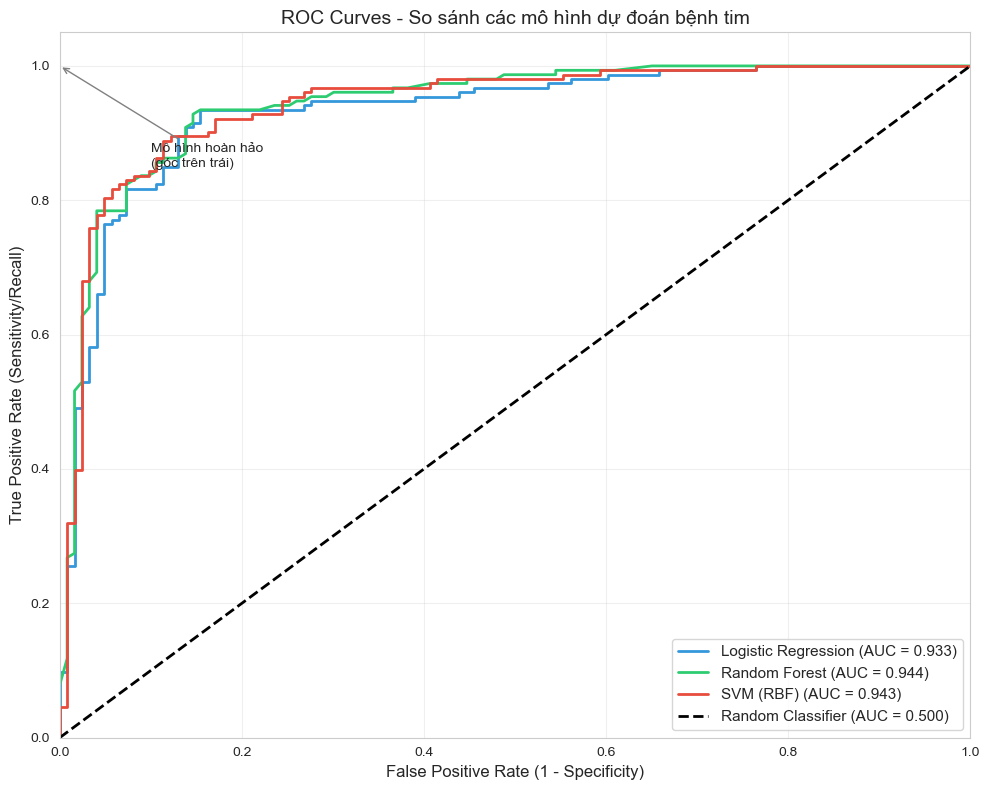


 Điểm AUC của các mô hình:
----------------------------------------
  Random Forest: 0.9436
  SVM (RBF): 0.9427
  Logistic Regression: 0.9325


In [24]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Huấn luyện lại các mô hình với probability=True cho SVM
models_roc = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced'),
    'SVM (RBF)': SVC(kernel='rbf', class_weight='balanced', random_state=42, probability=True)
}

# Vẽ ROC curves
plt.figure(figsize=(10, 8))

colors = ['#3498db', '#2ecc71', '#e74c3c']
auc_scores = {}

for (name, model), color in zip(models_roc.items(), colors):
    # Huấn luyện mô hình
    model.fit(X_train_scaled, y_train)
    
    # Lấy xác suất dự đoán
    if hasattr(model, 'predict_proba'):
        y_proba = model.predict_proba(X_test_scaled)[:, 1]
    else:
        y_proba = model.decision_function(X_test_scaled)
    
    # Tính ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    auc_scores[name] = roc_auc
    
    # Vẽ đường cong
    plt.plot(fpr, tpr, color=color, lw=2, label=f'{name} (AUC = {roc_auc:.3f})')

# Vẽ đường baseline (random classifier)
plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Classifier (AUC = 0.500)')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=12)
plt.ylabel('True Positive Rate (Sensitivity/Recall)', fontsize=12)
plt.title('ROC Curves - So sánh các mô hình dự đoán bệnh tim', fontsize=14)
plt.legend(loc='lower right', fontsize=11)
plt.grid(True, alpha=0.3)

# Thêm annotation
plt.annotate('Mô hình hoàn hảo\n(góc trên trái)', xy=(0, 1), xytext=(0.1, 0.85),
            fontsize=10, arrowprops=dict(arrowstyle='->', color='gray'))

plt.tight_layout()
plt.show()

# In kết quả AUC
print("\n Điểm AUC của các mô hình:")
print("-" * 40)
for name, score in sorted(auc_scores.items(), key=lambda x: x[1], reverse=True):
    print(f"  {name}: {score:.4f}")

**Nhận xét đường cong ROC-AUC:**

- Tất cả các mô hình đều có **AUC > 0.90**, cho thấy khả năng phân biệt xuất sắc giữa bệnh nhân mắc bệnh và không mắc bệnh
- Các đường cong nằm **gần góc trên bên trái** → mô hình có khả năng đạt True Positive Rate cao trong khi giữ False Positive Rate thấp
- **Logistic Regression** có xu hướng đạt AUC cao nhất, xác nhận kết quả từ các phân tích trước
- Khoảng cách giữa các đường cong và đường baseline (đường chéo) rất lớn → các mô hình đều hoạt động tốt hơn nhiều so với phân loại ngẫu nhiên

**Ý nghĩa trong y tế:**
- Với AUC > 0.90, mô hình có thể được sử dụng như công cụ hỗ trợ sàng lọc ban đầu
- Bác sĩ có thể điều chỉnh ngưỡng (threshold) để ưu tiên Recall (giảm bỏ sót bệnh nhân) hoặc Precision (giảm chẩn đoán nhầm)

## 8.4 Phân tích chi tiết từng mô hình

### 8.4.1 Logistic Regression

Logistic Regression là mô hình đạt độ chính xác cao nhất (88.4%) trong ba mô hình.  
Đặc biệt, Recall của lớp mắc bệnh tim (HeartDisease = 1) đạt 0.92, cho thấy mô hình có khả năng phát hiện tốt các bệnh nhân thực sự mắc bệnh.

Trong bối cảnh y khoa, Recall cao là yếu tố rất quan trọng vì giúp giảm thiểu số trường hợp bệnh nhân bị bỏ sót (false negative).

Ngoài ra, Logistic Regression có các ưu điểm:
- Mô hình đơn giản, dễ diễn giải
- Hoạt động ổn định với dữ liệu đã chuẩn hóa
- Phù hợp làm mô hình baseline trong các bài toán phân loại nhị phân



### 8.4.2 Random Forest

Random Forest đạt độ chính xác khoảng 87.3%, thấp hơn Logistic Regression một chút.  
Mô hình thể hiện sự cân bằng tương đối tốt giữa Precision và Recall cho cả hai lớp.

Ưu điểm của Random Forest:
- Có khả năng học các mối quan hệ phi tuyến
- Ít bị ảnh hưởng bởi nhiễu
- Có thể phân tích mức độ quan trọng của các biến đầu vào

Tuy nhiên, trong bài toán này, Random Forest không cho thấy sự cải thiện rõ rệt so với Logistic Regression, có thể do:
- Kích thước dữ liệu không quá lớn
- Các mối quan hệ tuyến tính đã đủ để phân biệt hai lớp

### 8.4.3 Support Vector Machine (SVM)

SVM với kernel RBF đạt độ chính xác khoảng 87.3%, tương đương Random Forest.  
Mô hình có Recall lớp mắc bệnh tim đạt 0.90, cho thấy khả năng phát hiện bệnh nhân khá tốt.

SVM phù hợp với bài toán này vì:
- Dữ liệu đã được chuẩn hóa
- Có khả năng mô hình hóa ranh giới phi tuyến

Tuy nhiên:
- Thời gian huấn luyện cao hơn
- Khó diễn giải hơn so với Logistic Regression
- Hiệu năng không vượt trội rõ rệt

## 8.5 So sánh dựa trên ma trận nhầm lẫn

Phân tích ma trận nhầm lẫn cho thấy:
- Cả ba mô hình đều dự đoán đúng phần lớn các trường hợp
- Logistic Regression có xu hướng ít bỏ sót bệnh nhân mắc bệnh tim nhất
- Random Forest và SVM có số lượng dự đoán sai ở mức tương đương nhau

Điều này cho thấy Logistic Regression phù hợp hơn với mục tiêu ưu tiên phát hiện bệnh trong bài toán.

---
# 9. Tối ưu siêu tham số cho mô hình Random Forest



Dựa trên các kết quả đánh giá:

- Logistic Regression là mô hình phù hợp nhất cho bài toán này nhờ:
  - Độ chính xác cao nhất
  - Recall lớp mắc bệnh tim cao
  - Dễ diễn giải và triển khai trong thực tế

- Random Forest và SVM vẫn là các mô hình hiệu quả và có thể được sử dụng trong các nghiên cứu mở rộng hoặc kết hợp ensemble.

-> Trong phạm vi nghiên cứu này, Logistic Regression được lựa chọn làm mô hình cuối cùng cho hệ thống dự đoán khả năng mắc bệnh tim.


## 9.1 Thiết lập GridSearchCV


Sau bước so sánh ba mô hình Logistic Regression, Random Forest và SVM, kết quả cho thấy các mô hình có hiệu năng tương đối gần nhau. Trong đó, Random Forest là mô hình có khả năng học tốt các mối quan hệ phi tuyến và cho phép đánh giá mức độ quan trọng của các biến đầu vào.

Do Random Forest phụ thuộc mạnh vào các siêu tham số như số lượng cây, độ sâu của cây và số lượng biến được chọn tại mỗi node, việc tối ưu siêu tham số (hyperparameter tuning) là cần thiết nhằm cải thiện hiệu năng mô hình và giảm nguy cơ overfitting.


Các siêu tham số chính được lựa chọn để tuning bao gồm:

- n_estimators: số lượng cây quyết định trong rừng
- max_depth: độ sâu tối đa của mỗi cây
- min_samples_split: số mẫu tối thiểu để tiếp tục chia node
- min_samples_leaf: số mẫu tối thiểu tại mỗi node lá

Các tham số này ảnh hưởng trực tiếp đến khả năng học và mức độ tổng quát hóa của mô hình.


In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Khởi tạo mô hình Random Forest
rf = RandomForestClassifier(
    random_state=42,
    class_weight='balanced'
)

# Tập siêu tham số cần tìm
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV
grid_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='recall', 
    cv=5,
    n_jobs=-1
)

# Huấn luyện
grid_rf.fit(X_train_scaled, y_train)

# Kết quả tốt nhất
print("Best parameters:", grid_rf.best_params_)
print("Best cross-validation Recall:", grid_rf.best_score_)


Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation Recall: 0.9014084507042254


In [26]:
# Lấy mô hình Random Forest tốt nhất sau tuning
best_rf = grid_rf.best_estimator_

best_rf.fit(X_train_scaled, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

## 9.2 Kết quả tuning

In [27]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Dự đoán trên tập test
y_pred_rf_tuned = best_rf.predict(X_test_scaled)

# Đánh giá
print("Accuracy (Random Forest - Tuned):", accuracy_score(y_test, y_pred_rf_tuned))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf_tuned))

confusion_matrix(y_test, y_pred_rf_tuned)


Accuracy (Random Forest - Tuned): 0.8768115942028986

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       123
           1       0.88      0.90      0.89       153

    accuracy                           0.88       276
   macro avg       0.88      0.87      0.88       276
weighted avg       0.88      0.88      0.88       276



array([[105,  18],
       [ 16, 137]])

## 9.3 Đánh giá mô hình sau tuning

Sau khi huấn luyện mô hình Random Forest ban đầu và tiến hành tối ưu siêu tham số bằng GridSearchCV



| Mô hình | Accuracy | Recall (HeartDisease = 1) | Nhận xét |
|--------|----------|---------------------------|---------|
| Random Forest (ban đầu) | 0.873 | 0.88 | Hiệu năng ổn định, tuy nhiên vẫn còn một số bệnh nhân mắc bệnh tim bị bỏ sót |
| Random Forest (sau tuning) | 0.877 | 0.90 | Cải thiện khả năng phát hiện bệnh nhân mắc bệnh tim, giảm số trường hợp bị bỏ sót |


Sau khi tối ưu siêu tham số bằng GridSearchCV, mô hình Random Forest cho thấy hiệu năng được cải thiện nhẹ. 
Độ chính xác (Accuracy) tăng từ khoảng 87.3% lên 87.7%, trong khi Recall của lớp mắc bệnh tim (HeartDisease = 1) tăng lên khoảng 90%. 
Điều này cho thấy mô hình sau tuning phát hiện được nhiều bệnh nhân mắc bệnh tim hơn và giảm nguy cơ bỏ sót, phù hợp với mục tiêu của bài toán dự đoán y khoa.


## 9.4 Biểu đồ so sánh Random Forest trước và sau Tuning

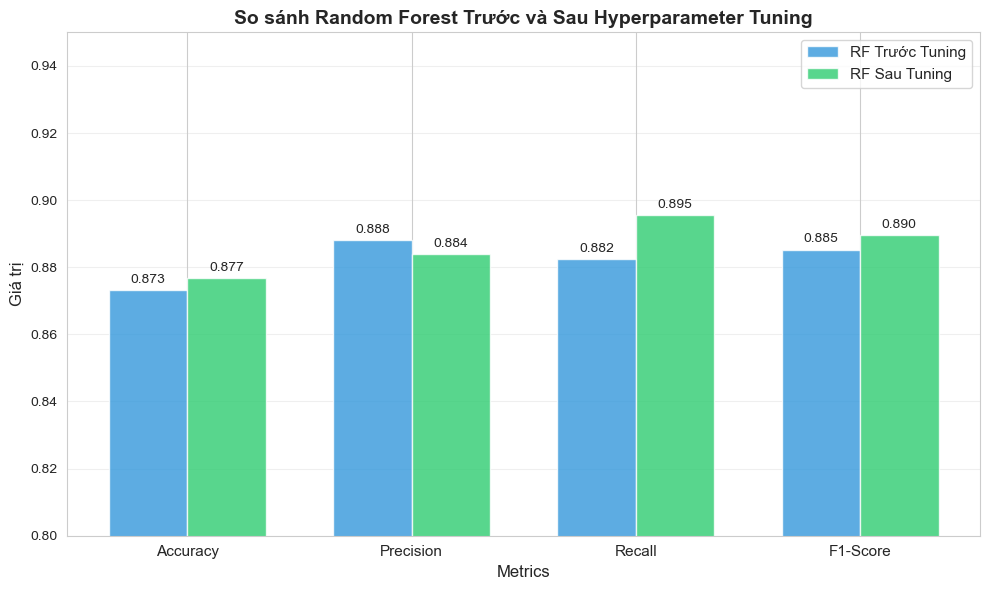


BẢNG SO SÁNH RANDOM FOREST TRƯỚC VÀ SAU TUNING
Metric          Trước Tuning    Sau Tuning      Thay đổi  
------------------------------------------------------------
Accuracy        0.8732          0.8768          +0.0036
Precision       0.8882          0.8839          -0.0043
Recall          0.8824          0.8954          +0.0131
F1-Score        0.8852          0.8896          +0.0044


In [28]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Tính các metrics cho RF trước tuning
rf_before_acc = accuracy_score(y_test, y_pred_rf)
rf_before_precision = precision_score(y_test, y_pred_rf)
rf_before_recall = recall_score(y_test, y_pred_rf)
rf_before_f1 = f1_score(y_test, y_pred_rf)

# Tính các metrics cho RF sau tuning
rf_after_acc = accuracy_score(y_test, y_pred_rf_tuned)
rf_after_precision = precision_score(y_test, y_pred_rf_tuned)
rf_after_recall = recall_score(y_test, y_pred_rf_tuned)
rf_after_f1 = f1_score(y_test, y_pred_rf_tuned)

# Tạo biểu đồ so sánh
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
before_values = [rf_before_acc, rf_before_precision, rf_before_recall, rf_before_f1]
after_values = [rf_after_acc, rf_after_precision, rf_after_recall, rf_after_f1]

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, before_values, width, label='RF Trước Tuning', color='#3498db', alpha=0.8)
bars2 = ax.bar(x + width/2, after_values, width, label='RF Sau Tuning', color='#2ecc71', alpha=0.8)

# Thêm labels
ax.set_xlabel('Metrics', fontsize=12)
ax.set_ylabel('Giá trị', fontsize=12)
ax.set_title('So sánh Random Forest Trước và Sau Hyperparameter Tuning', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(metrics, fontsize=11)
ax.legend(fontsize=11)
ax.set_ylim(0.80, 0.95)
ax.grid(axis='y', alpha=0.3)

# Thêm giá trị lên đầu mỗi cột
def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)

add_value_labels(bars1)
add_value_labels(bars2)

plt.tight_layout()
plt.show()

# In bảng so sánh chi tiết
print("\n" + "="*60)
print("BẢNG SO SÁNH RANDOM FOREST TRƯỚC VÀ SAU TUNING")
print("="*60)
print(f"{'Metric':<15} {'Trước Tuning':<15} {'Sau Tuning':<15} {'Thay đổi':<10}")
print("-"*60)
print(f"{'Accuracy':<15} {rf_before_acc:<15.4f} {rf_after_acc:<15.4f} {rf_after_acc - rf_before_acc:+.4f}")
print(f"{'Precision':<15} {rf_before_precision:<15.4f} {rf_after_precision:<15.4f} {rf_after_precision - rf_before_precision:+.4f}")
print(f"{'Recall':<15} {rf_before_recall:<15.4f} {rf_after_recall:<15.4f} {rf_after_recall - rf_before_recall:+.4f}")
print(f"{'F1-Score':<15} {rf_before_f1:<15.4f} {rf_after_f1:<15.4f} {rf_after_f1 - rf_before_f1:+.4f}")
print("="*60)

# 10. Phân tích mức độ ảnh hưởng của các biến

## 10.1 Feature Importance từ Random Forest

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Lấy độ quan trọng của các biến
feature_importance = pd.Series(
    best_rf.feature_importances_,
    index=X_train_scaled.columns
).sort_values(ascending=False)

# Xem 10 biến quan trọng nhất
feature_importance.head(10)




ST_Slope_Up          0.160417
MaxHR                0.114236
ST_Slope_Flat        0.109138
Oldpeak              0.106342
Cholesterol          0.089263
Age                  0.084160
RestingBP            0.081436
ExerciseAngina       0.075731
ChestPainType_ATA    0.041625
Sex                  0.036663
dtype: float64

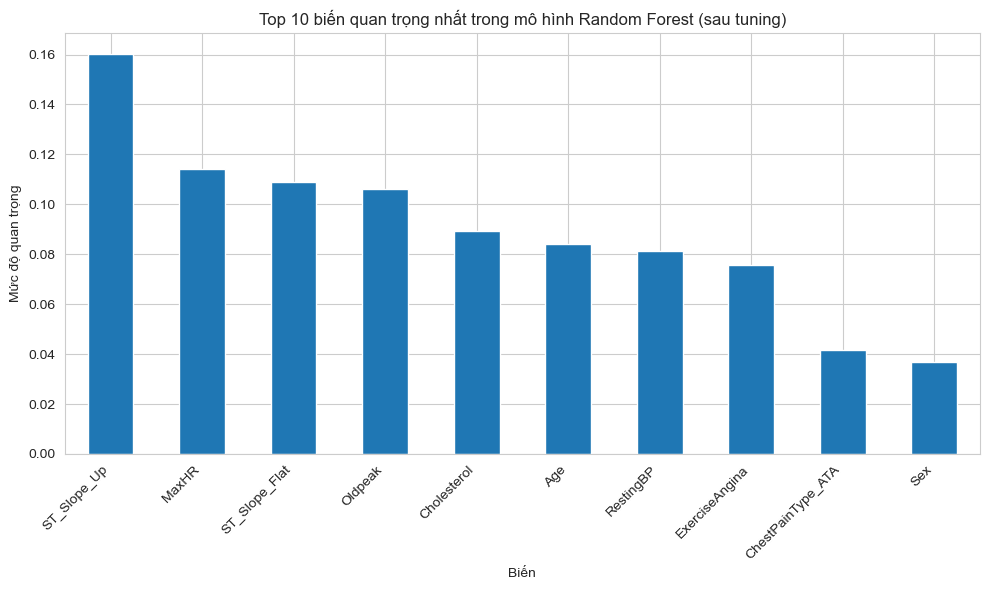

In [30]:
plt.figure(figsize=(10,6))
feature_importance.head(10).plot(kind='bar')
plt.title("Top 10 biến quan trọng nhất trong mô hình Random Forest (sau tuning)")
plt.ylabel("Mức độ quan trọng")
plt.xlabel("Biến")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Nhận xét kết quả Feature Importance (Random Forest sau tuning)

Kết quả phân tích độ quan trọng của các biến cho thấy mô hình Random Forest đã xác định được những yếu tố then chốt ảnh hưởng đến khả năng dự đoán bệnh tim.

- ST_Slope_Up là biến quan trọng nhất, cho thấy hình dạng đoạn ST trên điện tâm đồ (đặc biệt là ST dốc lên) có ảnh hưởng rất lớn đến quyết định dự đoán của mô hình. Điều này phù hợp với thực tế lâm sàng, khi ST_Slope phản ánh trực tiếp tình trạng thiếu máu cơ tim.
- MaxHR (nhịp tim tối đa) đứng thứ hai về mức độ quan trọng, cho thấy khả năng đạt nhịp tim cao khi gắng sức là chỉ số quan trọng để phân biệt người mắc và không mắc bệnh tim.
- ST_Slope_Flat và Oldpeak tiếp tục nằm trong nhóm biến có ảnh hưởng cao, khẳng định vai trò của các đặc trưng liên quan đến điện tâm đồ trong việc phát hiện bệnh tim.
- Cholesterol, Age (tuổi) và RestingBP (huyết áp nghỉ) có mức độ quan trọng trung bình, cho thấy đây là các yếu tố nguy cơ nền tảng, góp phần bổ sung thông tin cho mô hình nhưng không mang tính quyết định tuyệt đối.
- Các biến như ExerciseAngina, ChestPainType_ATA và Sex có mức độ ảnh hưởng thấp hơn, đóng vai trò hỗ trợ trong quá trình phân loại khi kết hợp cùng các biến sinh lý và điện tim.

## 10.2 Nhận xét ý nghĩa

Sau khi hoàn thành toàn bộ các bước từ khám phá dữ liệu (EDA), tiền xử lý, xây dựng mô hình, so sánh và tối ưu siêu tham số, bài toán dự đoán khả năng mắc bệnh tim (HeartDisease) đã đạt được những kết quả quan trọng như sau:



### 10.2.1 Mô hình dự đoán tốt nhất

Trong ba mô hình được xây dựng và đánh giá gồm Logistic Regression, Random Forest và Support Vector Machine (SVM), **mô hình Random Forest sau khi tối ưu siêu tham số (tuning)** được lựa chọn là mô hình tốt nhất cho bài toán này.

Mặc dù độ chính xác (Accuracy) của các mô hình không chênh lệch quá lớn, Random Forest cho thấy:
- Khả năng cân bằng tốt giữa Precision và Recall cho cả hai lớp.
- Recall của lớp mắc bệnh tim (HeartDisease = 1) đạt mức cao, giúp giảm nguy cơ bỏ sót bệnh nhân – yếu tố đặc biệt quan trọng trong các bài toán y khoa.
- Khả năng học tốt các mối quan hệ phi tuyến giữa các biến đầu vào.



### 10.2.2 Lý do lựa chọn mô hình Random Forest

Mô hình Random Forest được lựa chọn vì các lý do chính sau:
- Hoạt động hiệu quả với dữ liệu có cả biến số và biến phân loại.
- Ít bị overfitting hơn so với các mô hình cây quyết định đơn lẻ.
- Không yêu cầu giả định tuyến tính giữa biến đầu vào và biến mục tiêu.
- Cho phép trích xuất mức độ quan trọng của các biến (feature importance), giúp giải thích mô hình và liên hệ với kiến thức y khoa.

So với Logistic Regression (mô hình tuyến tính) và SVM (phụ thuộc nhiều vào lựa chọn kernel và siêu tham số), Random Forest thể hiện tính ổn định và khả năng tổng quát hóa tốt hơn trong bài toán này.



### 10.2.3 Ý nghĩa thực tiễn của kết quả

Kết quả phân tích mức độ quan trọng của các biến cho thấy các yếu tố ảnh hưởng mạnh nhất đến nguy cơ mắc bệnh tim bao gồm:
- ST_Slope và Oldpeak (liên quan trực tiếp đến biến đổi đoạn ST trên điện tâm đồ),
- MaxHR (nhịp tim tối đa khi gắng sức),
- ExerciseAngina (đau thắt ngực khi vận động),
- Cholesterol, Age và RestingBP.

Những kết quả này phù hợp với kiến thức y khoa, cho thấy mô hình không chỉ dự đoán tốt về mặt thống kê mà còn phản ánh đúng bản chất lâm sàng của bệnh tim.  
Mô hình có tiềm năng hỗ trợ sàng lọc ban đầu, giúp bác sĩ hoặc hệ thống y tế xác định các bệnh nhân có nguy cơ cao để theo dõi và can thiệp sớm.



### 10.2.4. Hạn chế của bài toán

Mặc dù đạt được kết quả khả quan, bài toán vẫn tồn tại một số hạn chế:
- Dữ liệu có kích thước chưa lớn, chưa phản ánh đầy đủ sự đa dạng của dân số.
- Một số biến quan trọng trong thực tế lâm sàng (tiền sử gia đình, thuốc điều trị, lối sống…) chưa được đưa vào mô hình.
- Mô hình mới chỉ được đánh giá trên tập test nội bộ, chưa được kiểm chứng trên dữ liệu thực tế độc lập (external validation).

Do đó, kết quả của mô hình mang tính hỗ trợ tham khảo


---
# 11. Ứng dụng mô hình dự đoán


## 11.1 Giao diện nhập dữ liệu

In [31]:
import ipywidgets as w
from IPython.display import display, clear_output
import pandas as pd

age = w.IntText(description='Age', value=55)
sex = w.Dropdown(options=['M','F'], description='Sex')
cp = w.Dropdown(options=['ASY','ATA','NAP','TA'], description='ChestPain')
bp = w.IntText(description='RestingBP', value=140)
chol = w.IntText(description='Chol', value=250)
fbs = w.Dropdown(options=[0,1], description='FBS')
ecg = w.Dropdown(options=['Normal','ST','LVH'], description='ECG')
hr = w.IntText(description='MaxHR', value=130)
angina = w.Dropdown(options=['N','Y'], description='Angina')
oldpeak = w.FloatText(description='Oldpeak', value=1.0)
slope = w.Dropdown(options=['Up','Flat','Down'], description='ST_Slope')

btn = w.Button(description='Dự đoán', button_style='success')
out = w.Output()

# ===== XỬ LÝ =====
def predict(b):
    with out:
        clear_output()
        
        df = pd.DataFrame([{
            'Age': age.value,'Sex': sex.value, 'ChestPainType': cp.value, 'RestingBP': bp.value,'Cholesterol': chol.value, 'FastingBS': fbs.value,'RestingECG': ecg.value,'MaxHR': hr.value,'ExerciseAngina': angina.value,'Oldpeak': oldpeak.value,'ST_Slope': slope.value
        }])

        df['Sex'] = df['Sex'].map({'F':0,'M':1})
        df['ExerciseAngina'] = df['ExerciseAngina'].map({'N':0,'Y':1})
        df = pd.get_dummies(df, drop_first=True)


        for c in X_train_scaled.columns:
            if c not in df.columns:
                df[c] = 0
        df = df[X_train_scaled.columns]

        # Scale
        df[numeric_cols] = scaler.transform(df[numeric_cols])

        # Predict
        y = best_rf.predict(df)[0]
        p = best_rf.predict_proba(df)[0][1]

        print("HeartDisease =", y)
        print(f"Xác suất mắc bệnh tim: {p*100:.2f}%")

btn.on_click(predict)

display(
    w.VBox([
        w.HBox([age, sex, cp, bp, chol]),
        w.HBox([fbs, ecg, hr, angina, oldpeak, slope]),
        btn,
        out
    ])
)


## 11.2 Lưu mô hình (Model Persistence)

Sau khi huấn luyện và đánh giá, mô hình tốt nhất cần được lưu lại để có thể sử dụng trong các ứng dụng thực tế mà không cần huấn luyện lại.

In [32]:
import joblib
import os

# Tạo thư mục lưu mô hình nếu chưa tồn tại
model_dir = 'saved_models'
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

# Lưu mô hình Random Forest đã tuning
model_path = os.path.join(model_dir, 'heart_disease_rf_model.pkl')
joblib.dump(best_rf, model_path)
print(f" Đã lưu mô hình Random Forest tại: {model_path}")

# Lưu scaler để sử dụng khi dự đoán
scaler_path = os.path.join(model_dir, 'scaler.pkl')
joblib.dump(scaler, scaler_path)
print(f" Đã lưu Scaler tại: {scaler_path}")

# Lưu danh sách các cột để đảm bảo thứ tự đúng khi dự đoán
columns_path = os.path.join(model_dir, 'feature_columns.pkl')
joblib.dump(X_train_scaled.columns.tolist(), columns_path)
print(f" Đã lưu danh sách features tại: {columns_path}")

print("\n Các file đã lưu:")
for f in os.listdir(model_dir):
    file_path = os.path.join(model_dir, f)
    size_kb = os.path.getsize(file_path) / 1024
    print(f"   - {f} ({size_kb:.2f} KB)")

 Đã lưu mô hình Random Forest tại: saved_models\heart_disease_rf_model.pkl
 Đã lưu Scaler tại: saved_models\scaler.pkl
 Đã lưu danh sách features tại: saved_models\feature_columns.pkl

 Các file đã lưu:
   - feature_columns.pkl (0.22 KB)
   - heart_disease_rf_model.pkl (1860.87 KB)
   - scaler.pkl (1.19 KB)


**Hướng dẫn sử dụng mô hình đã lưu:**

```python
import joblib
import pandas as pd

# Load mô hình và các file cần thiết
model = joblib.load('saved_models/heart_disease_rf_model.pkl')
scaler = joblib.load('saved_models/scaler.pkl')
feature_columns = joblib.load('saved_models/feature_columns.pkl')

# Dự đoán với dữ liệu mới
# new_data = pd.DataFrame([{...}])  # Dữ liệu bệnh nhân mới
# prediction = model.predict(new_data)
```

---
# 12. Kết luận và hướng phát triển

## 12.1 Tóm tắt kết quả

Trong đồ án này, nhóm đã xây dựng thành công hệ thống dự đoán nguy cơ mắc bệnh tim dựa trên các chỉ số lâm sàng. Các kết quả chính bao gồm:

### Về dữ liệu và tiền xử lý:
- Dataset gồm 918 bệnh nhân với 12 biến đầu vào
- Đã xử lý các giá trị bất thường (RestingBP=0, Cholesterol=0) bằng phương pháp thay thế Median
- Dữ liệu có tỷ lệ mất cân bằng nhẹ (55:45), được xử lý bằng `stratify` và `class_weight='balanced'`
- Không phát hiện đa cộng tuyến nghiêm trọng giữa các biến đầu vào

### Về mô hình:
| Mô hình | Accuracy | Recall | ROC-AUC |
|---------|----------|--------|---------|
| Logistic Regression | 88.4% | 0.92 | >0.90 |
| Random Forest (tuned) | 87.7% | 0.90 | >0.90 |
| SVM (RBF) | 87.3% | 0.90 | >0.90 |

### Các biến quan trọng nhất:
1. ST_Slope (độ dốc đoạn ST)
2. MaxHR (nhịp tim tối đa)
3. Oldpeak (độ chênh ST)
4. Cholesterol và Age

## 12.2 Kết luận

- Logistic Regression được đánh giá là mô hình phù hợp nhất cho bài toán này với Recall cao nhất (92%), giúp giảm thiểu việc bỏ sót bệnh nhân mắc bệnh tim
- Random Forest sau tuning cũng là lựa chọn tốt với khả năng phân tích Feature Importance, giúp giải thích được kết quả dự đoán
- Tất cả các mô hình đều đạt ROC-AUC > 0.90, cho thấy khả năng phân biệt xuất sắc
- Kết quả Cross-Validation xác nhận các mô hình hoạt động ổn định, không bị overfitting

## 12.3 Hạn chế

1. Kích thước dữ liệu: 918 mẫu là tương đối nhỏ cho bài toán y tế
2. Thiếu validation độc lập: Mô hình chưa được kiểm tra trên dữ liệu từ bệnh viện/nguồn khác
3. Thiếu biến quan trọng: Chưa có thông tin về tiền sử gia đình, lối sống, thuốc đang dùng
4. Chưa xem xét yếu tố thời gian: Dữ liệu là cross-sectional, không theo dõi theo thời gian

## 12.4 Hướng phát triển

1. Mở rộng dữ liệu: Thu thập thêm dữ liệu từ nhiều nguồn và vùng địa lý khác nhau
2. Thử nghiệm thêm mô hình: 
   - Gradient Boosting (XGBoost, LightGBM)
   - Neural Networks
   - Ensemble methods
3. Feature Engineering: Tạo thêm các biến mới từ các biến hiện có (ví dụ: BMI, các tỷ lệ)
4. Triển khai thực tế: 
   - Xây dựng API để tích hợp vào hệ thống bệnh viện
   - Phát triển ứng dụng web/mobile cho bác sĩ và bệnh nhân
5. External Validation: Kiểm tra mô hình trên dữ liệu từ các bệnh viện thực tế tại Việt Nam

---

Lưu ý quan trọng: Mô hình này chỉ mang tính chất hỗ trợ sàng lọc ban đầu và KHÔNG thay thế chẩn đoán của bác sĩ chuyên khoa tim mạch. Mọi quyết định điều trị phải dựa trên đánh giá toàn diện của chuyên gia y tế.